# Education Project
## Introduction
This project examines whether schools serving higher concentrations of economically disadvantaged students systematically offer fewer college-preparatory opportunities, and whether these institutional differences help explain achievement gaps in ACT scores. Using data from 7,227 U.S. high schools, we integrated socioeconomic indicators with institutional resource measures to uncover the structural factors that contribute to standardized test performance disparities. Our analysis reveals that while high-poverty schools face significant resource disadvantages—offering fewer Advanced Placement courses, reduced calculus access, higher suspension rates, and elevated chronic absenteeism—these institutional differences account for only approximately 12% of the poverty-achievement relationship, suggesting comprehensive interventions must address factors beyond school-level resources.

## Data
*   **`EdGap_data.xlsx`**: This dataset, from EdGap.org, data on average ACT/SAT scores for schools, along with socioeconomic characteristics of their surrounding census tracts. Variables include unemployment rates, college degree percentages, family structures, median household income, and the percentage of students eligible for free or reduced-price lunch.

*   **`ccd_sch_029_1617_w_1a_11212017.csv`**: Sourced from the National Center for Education Statistics (NCES) Common Core of Data for the 2016-2017 academic year, this file provides essential identifying and categorical information about schools, such as names, locations, types, educational levels, and charter status.

*   **`CRDC_2015-16_School_Data.csv`**: Sourced from the Civil Rights Data Collection (CRDC) for the 2015-16 school year, this dataset provides institutional resource measures, including AP/IB programs, advanced mathematics offerings, teacher qualifications, counselor availability, disciplinary rates, and chronic absenteeism.


As we move through the analysis, I will identify and explain any needs for additional data. When more nuanced questions arise that cannot be answered with our current datasets, we will seek out and incorporate new data sources to address our research objectives more thoroughly.



## Install Library

In [444]:
pip install -r '../requirements.txt'


Note: you may need to restart the kernel to use updated packages.


## Data Loading and Initial Exploration

In this section, we will load the primary datasets required for our analysis and conduct an initial exploration to understand our data's structure, content, and data quality. This initial step will help us identify any immediate data issues and plan our subsequent and iterative processing steps. 

In [445]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# settings to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### Loading Education Gap Data, School Information Data.csv and CRDC School Data

In [ ]:
# please use relative paths to ensure portability of the notebook across different environments
edgap_df = pd.read_excel('../data/EdGap_data.xlsx')
school_information = pd.read_csv(
    "../data/ccd_sch_029_1617_w_1a_11212017.csv",
    encoding='unicode_escape',
    low_memory=False,
    dtype={'NCESSCH': str}
)

# The CRDC dataset is not loaded initially because it is only needed for additional analysis
# to address specific research questions about institutional resources and equity.

/opt/homebrew/Cellar/jupyterlab/4.4.7/libexec/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed



We can't control Excel extensions, so this warning is safe to ignore.

Now examine the data structure and data types

In [447]:
edgap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   int64  
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.9 KB


Let's observe some summary statistics

In [448]:
edgap_df.describe(include='all')

NCESSCH School ID  CT Unemployment Rate  \
count       7.986000e+03           7972.000000   
mean        3.321869e+11              0.098730   
std         1.323638e+11              0.058959   
min         1.000016e+11              0.000000   
25%         2.105340e+11              0.058655   
50%         3.600085e+11              0.085649   
75%         4.226678e+11              0.123376   
max         5.605830e+11              0.590278   

       CT Pct Adults with College Degree  \
count                        7973.000000   
mean                            0.568930   
std                             0.165704   
min                             0.091493   
25%                             0.450828   
50%                             0.554979   
75%                             0.676571   
max                             1.000000   

       CT Pct Childre In Married Couple Family  CT Median Household Income  \
count                              7961.000000                 7966.000000   
mean                                  0.633440                52026.905222   
std                                   0.196764                24228.057079   
min                                   0.000000                 3589.000000   
25%                                   0.523810                36597.250000   
50%                                   0.667594                46833.500000   
75%                                   0.777135                61369.250000   
max                                   1.000000               226181.000000   

       School ACT average (or equivalent if SAT score)  \
count                                      7986.000000   
mean                                         20.181532   
std                                           2.595201   
min                                          -3.070818   
25%                                          18.600000   
50%                                          20.400000   
75%                                          21.910867   
max                                          32.362637   

       School Pct Free and Reduced Lunch  
count                        7986.000000  
mean                            0.420651  
std                             0.239754  
min                            -0.054545  
25%                             0.238501  
50%                             0.381570  
75%                             0.575447  
max                             0.998729

### Initial Observations from EdGap Dataset
- Contains 7986 schools observations with seven variables
- Most of columns contain nearly complete data, but of course, there are minor missing data
    - There are missing data in sever socioeconomic variables 
    - Percentage of children in married couple familes showing the most missing value at 25 observations

- ACT Score (act_avg):
    - The mean score is 20.18 with standard deviation of 2.6
    - The minimum score has an impossible value of -3.07, this imposed a data quality issue
- Free and Reduced Lunch (frl_percent):
    - Another invalid value of -0.054
- Socioeconomic Variables:
    - These variables show significant variation across different schools
    - Unemployment rate range from 0% to 59%
    - College degree attainment rate varies from 9% to 100%
    - Median household income range from $3600 to over $226000
- Conclusion on Data Quality:
    - The presence of negative values in key columns implies that there were data entry errors require us, as a data scientist to deal with it rigorously before analysis.

## Accessing Data Suitability Through Visualization
This step will help us determine whether the data can adequately address our research question regarding the relationship between ACT scores and socioecononmic factor. Let's create a pair plot to visualize the relationships between all numerical variables in the EdGap dataset. This visualization technique allows us to examine multiple bivariate relationships simultaneously and identify potential patterns, correlations, and data quality issues that might affect our analysis.

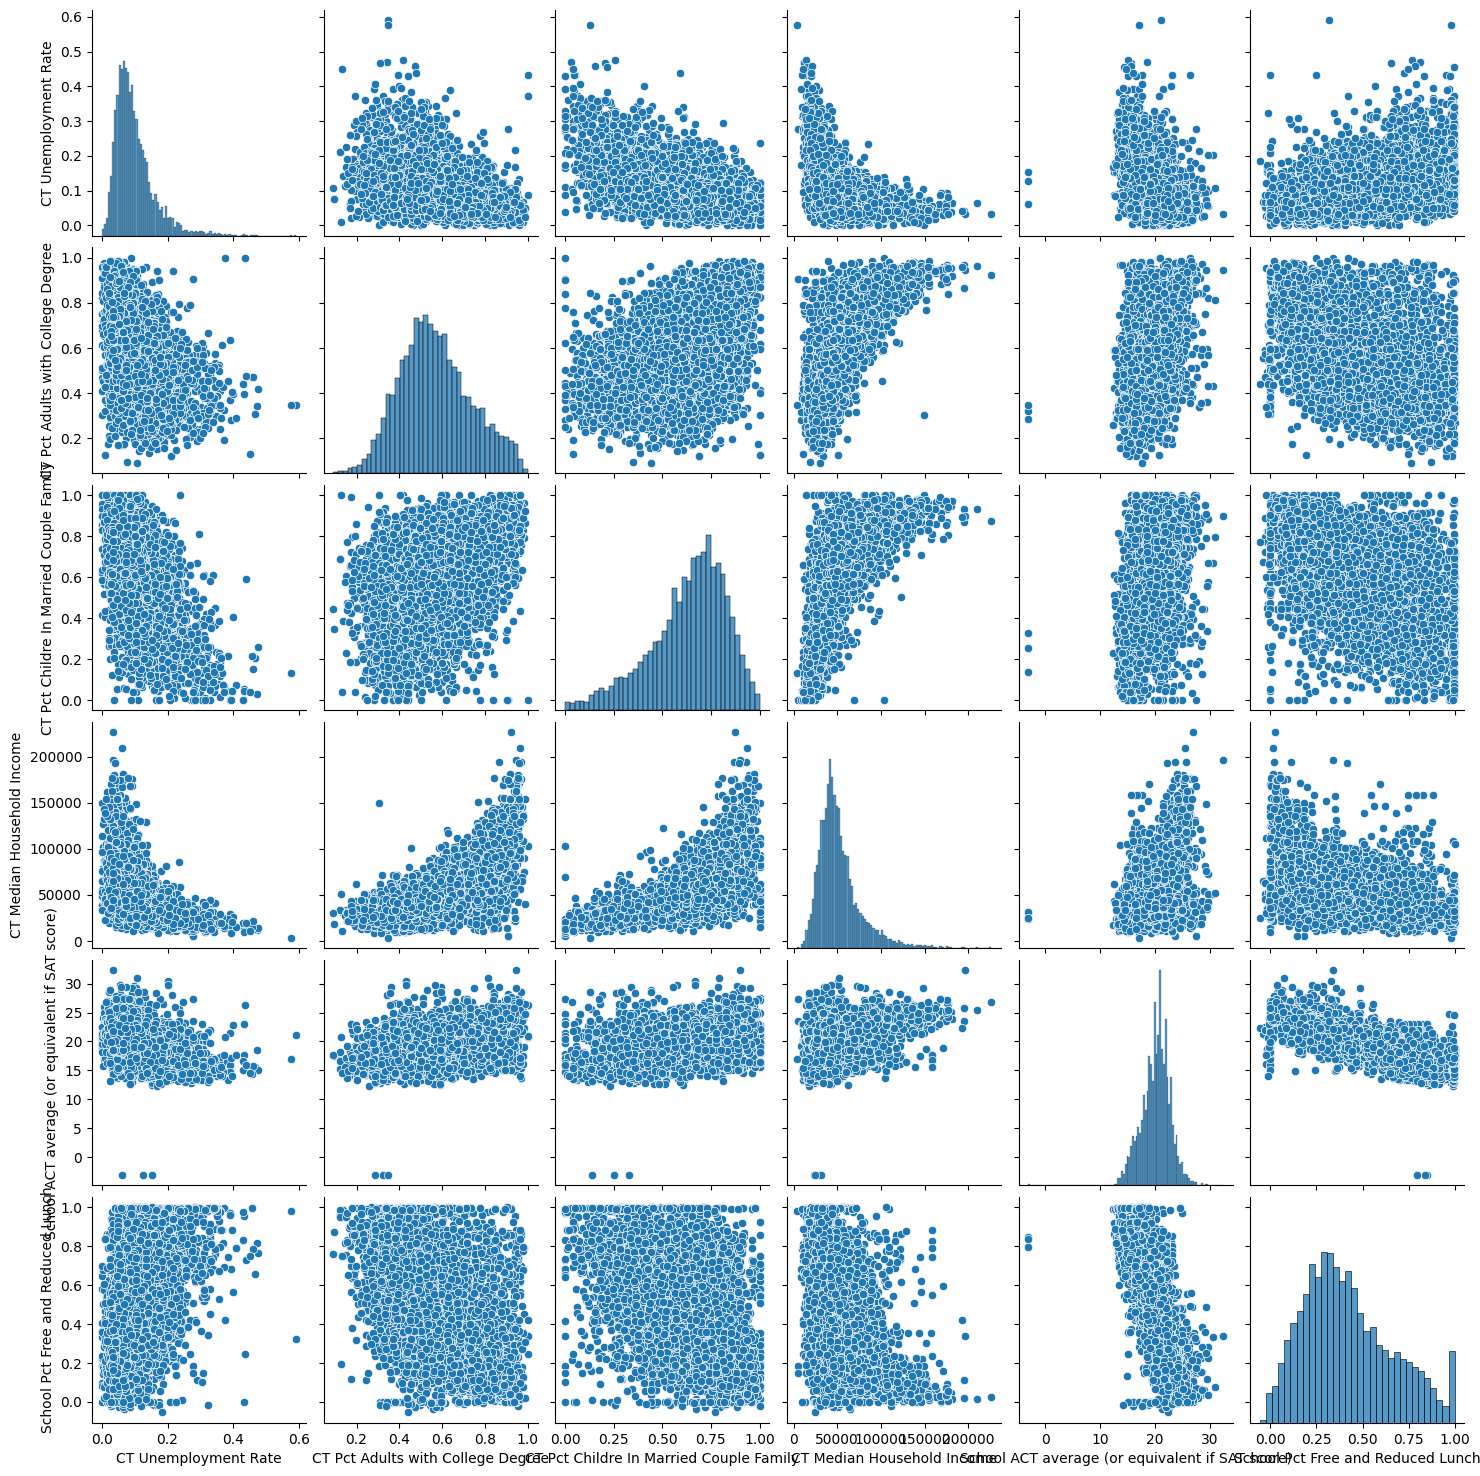

In [449]:
sns.pairplot(edgap_df.drop(columns="NCESSCH School ID"));
plt.show()

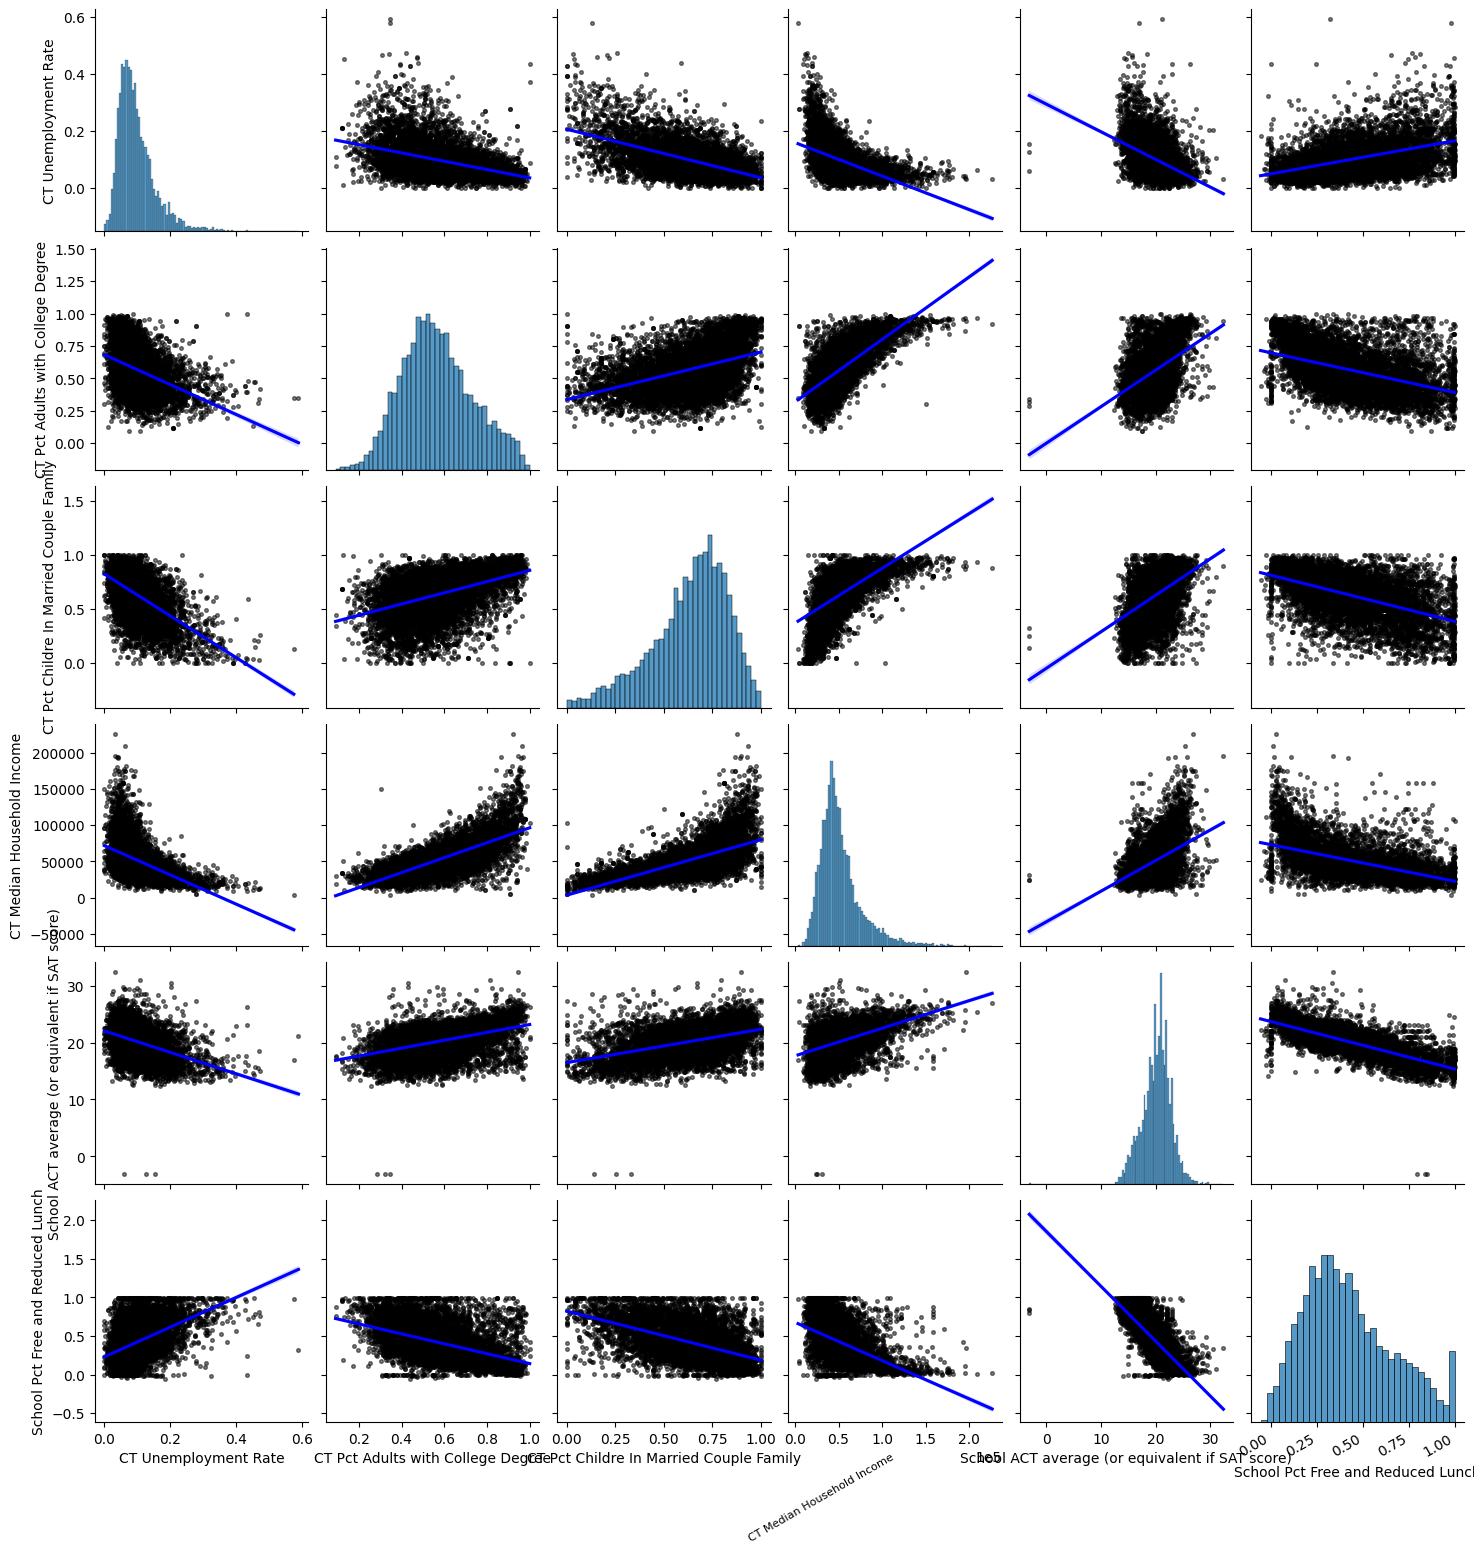

In [450]:
# pair plot with regression lines and custom formatting
fig = sns.pairplot(
    edgap_df.drop(columns="NCESSCH School ID"),
    kind="reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7}
    }
)

# the x-axis for median household income using scientific notation
for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
        ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
        ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

# Rotate x-axis tick labels
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

### Initial Observation of Pair Plot Visualization
Simple Pair Plot :
- Displaying all pairwise relationship between socioeconomics variables and ACT scores
- Data quality issues are immediately visible, including negative ACT scores and negative free lunch percentages that violate logical constraints
- Histograms on the diagonal reveal the distribution shape of each variable, with most appearing reasonably distributed though median income shows right skewness
- The scatter plots suggest potential relationships between predictors and outcomes, though trends are less obvious without fitted lines

Pair Plot with Regression:
- Negative relationships are evident between unemployment rate and ACT scores, and between free lunch percentage and ACT scores, indicating that schools in higher unemployment areas or serving more economically disadvantaged students tend to show lower achievement
- There appeared to be a strong positive relationships happen between the percentage of adults with college degrees and ACT scores, and between median household income and ACT scores, suggesting that community educational attainment and economic resources correlate with student performance
- The percentage of children in married couple families shows a moderate positive relationship with ACT scores


## Data Preparation:
#### First Step: Selecting Relevant Subset of Data

inspecting info() of school info data set

In [451]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  object 
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

The dataset contains over 102,000 school records with 65 columns, including school names, locations, and various attributes like grade levels, charter status, and socioeconomic details. However, many columns have missing values (e.g., UNION, MSTREET2), which will require cleaning and selecting relevant variables before analysis.




In [452]:
school_information = school_information[
    ['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']
]

### Rename Column

In [453]:
edgap_df = edgap_df.rename(
    columns={
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch",
    }
)

In [454]:
school_information = school_information.rename(
    columns={
        "SCHOOL_YEAR": "year",
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
        "CHARTER_TEXT": "charter"
    }
)

In this data preparation stage, we reduce the school information dataset to only the essential columns needed for our analysis and standardize all column names to follow lowercase snake case conventions. This preprocessing step simplifies subsequent operations by eliminating unnecessary variables, reduces the cognitive load when working with the data, and ensures consistency across both datasets before joining. By renaming the key variable to match in both dataframes before the merge, we make the join operation more transparent and our code more maintainable, establishing good habits that prevent errors and confusion as the project grows in complexity.

## Joining the Dataset

School information dateset column id is currently a float, in order to merge with id column form edgap dataset, we need to convert id to object

In [455]:
school_information['id'] = school_information['id'].astype('object')

Now we can merge:

In [456]:
edgap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   int64  
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.9 KB


Since edgap dataset as a primary dataset, containing critical outcome variable of ACT scores along with the socioeconomic preditors, hence, we use left merge to the primary dataset avoiding missing important datapoints

In [457]:
df = edgap_df.merge(
    school_information,
    how='left',
    on='id'
)

ValueError: You are trying to merge on int64 and object columns for key 'id'. If you wish to proceed you should use pd.concat

## Quality Control

This subsection, we will clean and validate the merged dataset by correcting errors, filtering for relevant school, and removing duplicate if we have.

In [ ]:
df.describe()

rate_unemployment  percent_college  percent_married  median_income  \
count        7972.000000      7973.000000      7961.000000    7966.000000   
mean            0.098730         0.568930         0.633440   52026.905222   
std             0.058959         0.165704         0.196764   24228.057079   
min             0.000000         0.091493         0.000000    3589.000000   
25%             0.058655         0.450828         0.523810   36597.250000   
50%             0.085649         0.554979         0.667594   46833.500000   
75%             0.123376         0.676571         0.777135   61369.250000   
max             0.590278         1.000000         1.000000  226181.000000   

       average_act  percent_lunch  
count  7986.000000    7986.000000  
mean     20.181532       0.420651  
std       2.595201       0.239754  
min      -3.070818      -0.054545  
25%      18.600000       0.238501  
50%      20.400000       0.381570  
75%      21.910867       0.575447  
max      32.362637       0.998729

In [ ]:
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

rate_unemployment  percent_college  percent_married  median_income  \
min               0.00             0.09              0.0         3589.0   
max               0.59             1.00              1.0       226181.0   

     average_act  percent_lunch  
min        -3.07          -0.05  
max        32.36           1.00

In [ ]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

In [ ]:
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

In [ ]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [ ]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [ ]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

In [ ]:
df = df.loc[df['school_level'] == 'High']

In [ ]:
df.duplicated().sum()

np.int64(0)

### Quality Controll Summary:
In this quality control stage:
- We systematically identify and address data integrity issues by checking variables against their natural bounds such that ACT scores must fall between 1 and 36, while percentages must range from 0 to 1. Rather than deleting entire rows containing invalid values where we would lose all the socioeconomics data, we set out-of-range values to NaN to preserve other valid information for those schools, maximizing our usable data. 
- We then filter the dataset to retain only high schools, since elementary and unspecified school levels are inappropriate for ACT testing. 
- Lastly, we verify that no duplicate rows exist in the merged dataset. This process ensures our subsequent analysis builds on clean, trustworthy data while maintaining the largest possible sample size for statistically robust results.Retry

### Dealing With Missing Data

Do we have missing values?

In [ ]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               3
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

Yes we do, what percentage of values of each variable are missing?

In [ ]:
percent_missing = df.isna().mean().round(4) * 100

percent_missing.to_frame(name='Percent Missing Values')

Percent Missing Values
id                                   0.00
rate_unemployment                    0.17
percent_college                      0.15
percent_married                      0.28
median_income                        0.22
average_act                          0.04
percent_lunch                        0.28
year                                 0.00
state                                0.00
zip_code                             0.00
school_type                          0.00
school_level                         0.00
charter                              0.00

How many states do we have data from?

In [ ]:
df['state'].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

In [ ]:
print("we have", df['state'].nunique(), 'states')

we have 20 states


Let's visualize it on a map

In [ ]:
import plotly.offline as po
import plotly.graph_objs as pg

layout = dict(
    geo={"scope": "usa"}, coloraxis_colorbar=dict(title="Number of Schools")
)

data = dict(
    type="choropleth",
    locations=df["state"].value_counts().index,
    locationmode="USA-states",
    z=df["state"].value_counts().values,
    coloraxis="coloraxis",
)

x = pg.Figure(data=[data], layout=layout)

po.iplot(x)

Missing data due to omission isn't evident by th number of NaN. We could theoretical get more date but not in the scope of this project

In [ ]:
df = df.dropna(subset=['average_act'])
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               0
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

Since ACT score is our outcome variable, that is the thing we are trying to predict, hence it won't contribute much to our analysis. Meanwhile, all the rest of NaN are in rows that has socioeconomics information, our predictors (dependent values), we don't want to just simply drop those because it will affect our analysis. Instead, we will impute the missing predictor. Plus, we have a only a 0.04 missing value from average ACT

### Data Imputation

In [ ]:
predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter'
]

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()

numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


This code select only numeric value for imputation to work, notice charter and state did not include and happened that those two does not missing value as well. So in the future make sure imputation include categorical value as well if there is missing value!

In [ ]:
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

Behind this impute, it trains a model for accurate prediction, then we use that to predict the approriate value according to the model it fit

In [ ]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

Now double check if we have missing value anymore:

In [ ]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                         0
percent_college                           0
percent_married                           0
median_income                             0
average_act                               0
percent_lunch                             0
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

Now the data is ready to be saved

In [ ]:
df.to_csv(
    '../data/education_clean.csv',
    encoding='utf-8-sig',
    index=False
)

# Exploratory Data Analysis

Now that we obtained our clean dataset that is ready for our analysis through data analysis and visualization. First we want to look at the correlation between our numerical predictors variable to our independent variable (average_act)

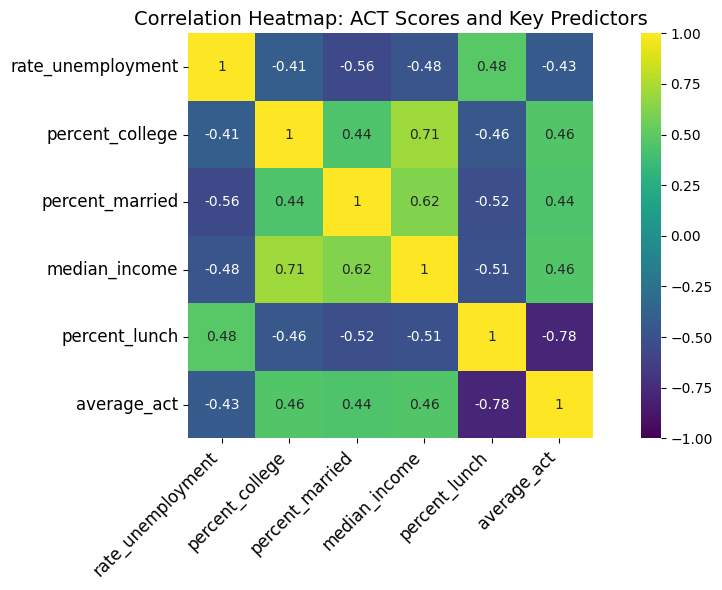

In [ ]:
predictor_variables = [
    'rate_unemployment', 'percent_college', 'percent_married',
    'median_income', 'percent_lunch', 'state', 'charter'
]

numerical_predictors = (
    df[predictor_variables]
      .select_dtypes(include='number')
      .columns
      .to_list()
)

corr_matrix = df[numerical_predictors + ["average_act"]].corr()

plt.figure(figsize=(10, 6))  # Adjust height for caption
sns.heatmap(
    corr_matrix,
    vmax=1, vmin=-1,
    square=True,
    annot=True,
    cmap="viridis"
)
plt.tick_params(labelsize=12)
plt.xticks(rotation=45, ha='right')  # Tilt x-axis variable names
plt.title("Correlation Heatmap: ACT Scores and Key Predictors", fontsize=14)

plt.tight_layout()
plt.show()

Several thing I've noticed from this observation:
- Average ACT score has a strong negatibe correlation (-.78) wwith the percentage of students receiving free or reduced-price lunch (percent_lunch)
- The figure shows moderate positive correlation with the percentage of adults with a college degree (percent_college), median household income (median_income), and percentage of children in married-couple family (percent_married)
- Moderate negative correlation with the unemploymnt rate (rate_unemployment)

So among these predictors, percent_college and median_income are strongly correlated with each other (0.71)

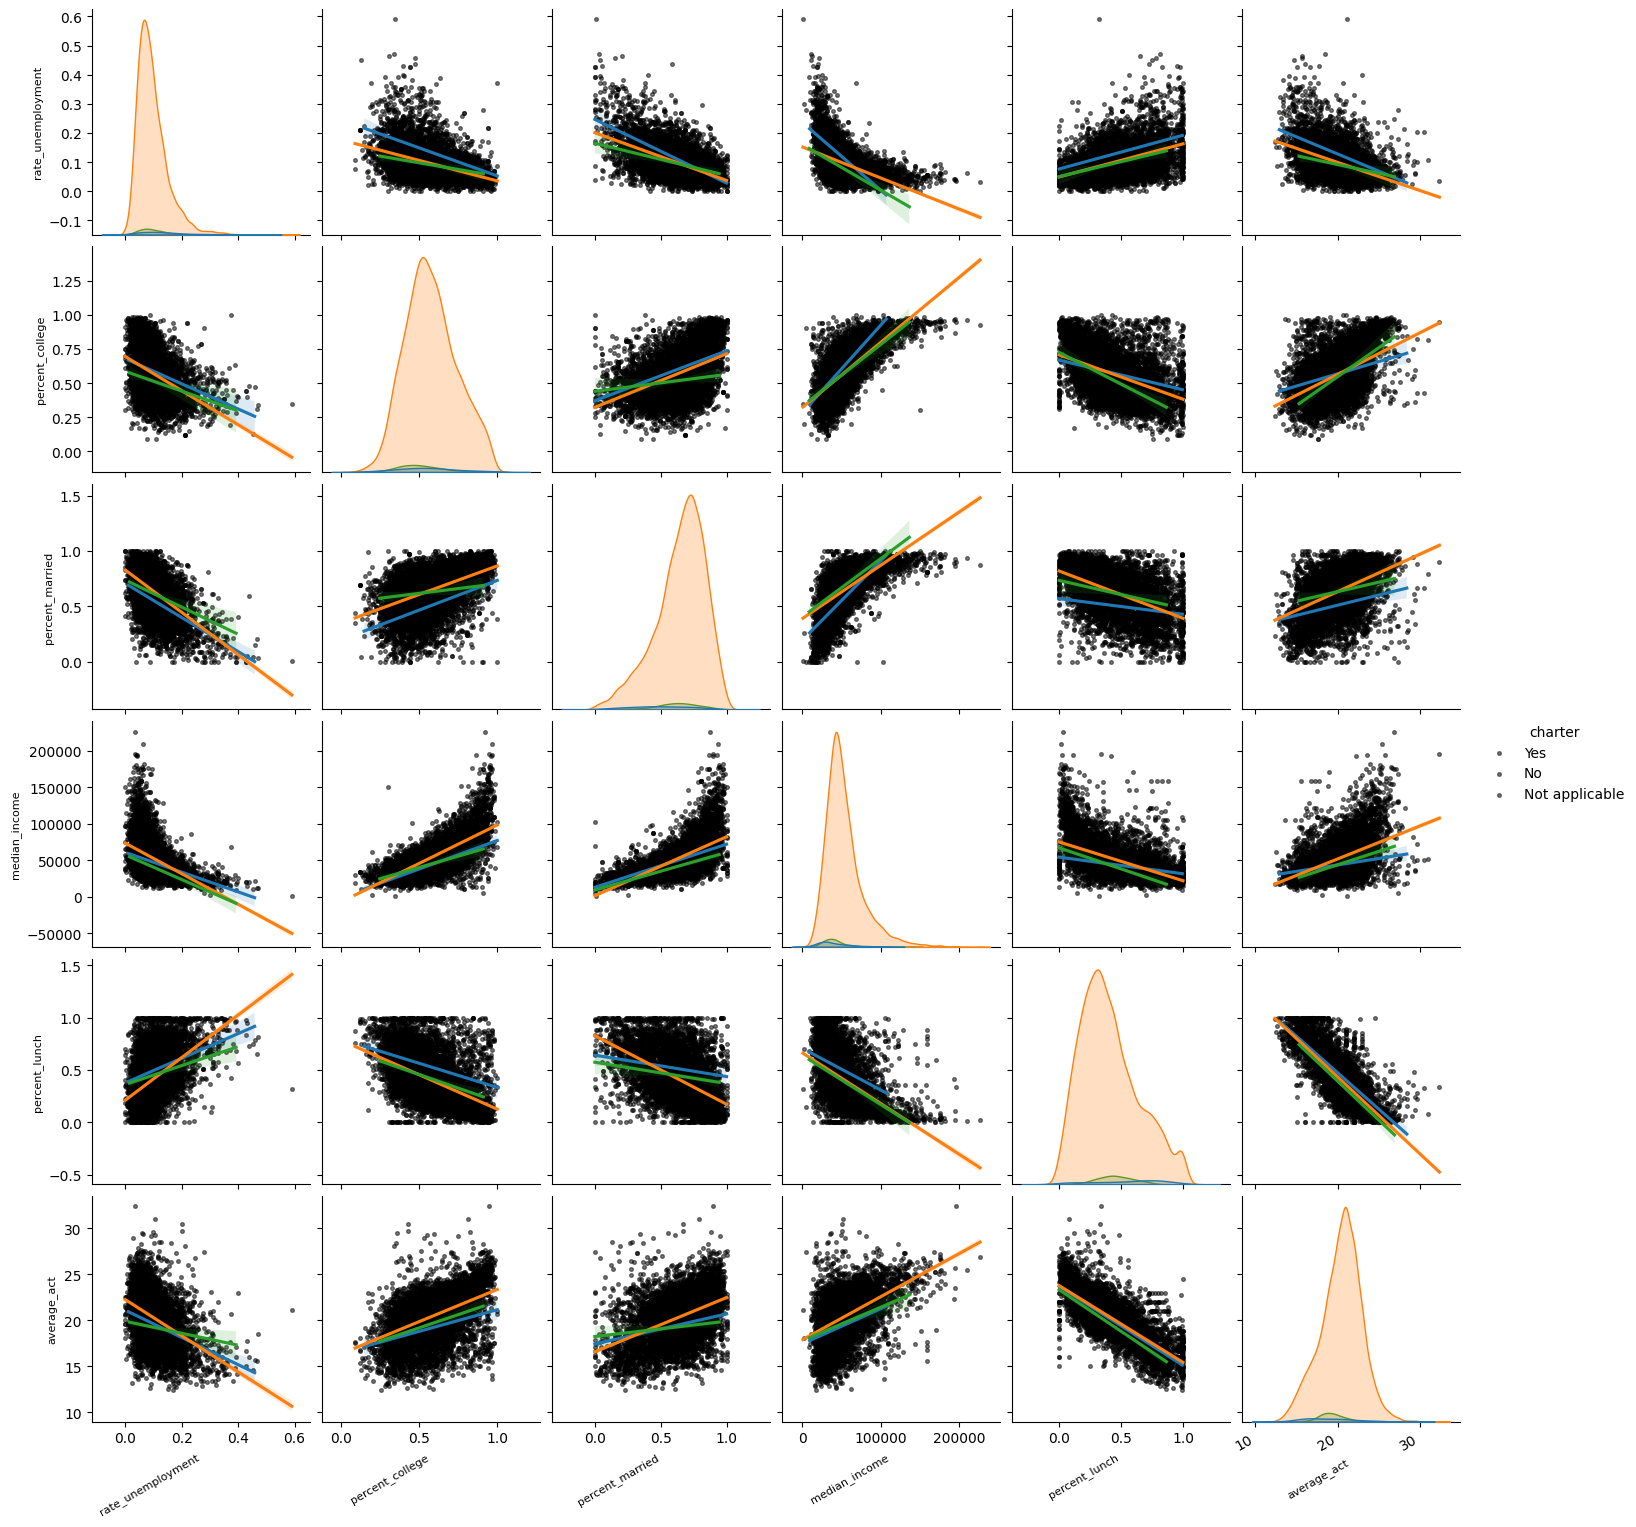

In [ ]:
fig = sns.pairplot(
    data=df,
    vars=numerical_predictors + ['average_act'],
    hue='charter',
    kind='reg',
    plot_kws={'scatter_kws': {'alpha': 0.5, 'color': 'k', 's': 7}},
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        # Applying scientific notation on this axis
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    # X-axis label size and rotation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')
    # Y-axis label size
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)

# Rotate x-axis tick labels
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()


What I can see here:
- There is a socioeconomics impact such that average ACT scores show a clear positive relationship with community wealth and education (median_income and percent college). There is also a strong negative relationship with poverty indicators (percent_lunch, rate_unemployment)

- Charter categories (yes, no, not applicable) regression line are quite similar across all plot. This possibly mean that the relationship between socioeconomic factos and ACT scores is consistent regardless whether school is charter or not

- The diagonal distribution of each variable are mostly skewed, especially median_income and rate_unemployment.

### Checking Outliers through Visualization

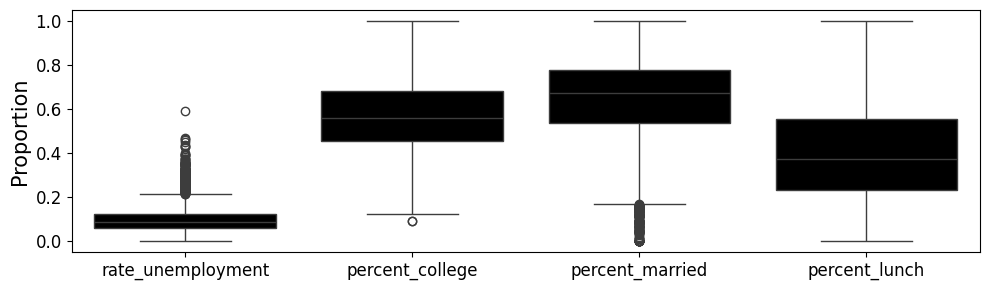

In [ ]:
plt.figure(figsize=(10, 3))
fractions = list(numerical_predictors)       # copy so we don't mutate the original

fractions.remove('median_income')

sns.boxplot(data=df[fractions], color='k')
plt.ylabel('Proportion', fontsize=15)
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.show()



- Unemployment rate is heavily skewed, there is a significant number of outiers with much higher employment rate
- There is a small outlier in percentage of adult with a college degree at the lower end
- The proportion of married couple families is high with highly left skewed by a long tail of outliers on the lower end
- The distribution of (percent_lunch) is fairly symmetrically distributed

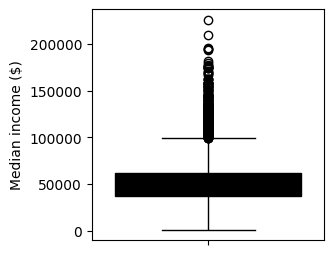

In [ ]:

plt.figure(figsize=(3, 3))
sns.boxplot(data=df, y='median_income', color='k')
plt.ylabel('Median income ($)')
plt.show()

The distribution of median household income is heavily right-skewed. The median is around $50,000, but there is a long tail of high-income outliers, with some communities having median incomes well above $100,000 and even exceeding $200,000. This indicates that while most schools are in areas with moderate incomes, a significant number are in a very rich communities.



## Modeling

### Single Input Model
We will use one input variable to predict the ACT performance.



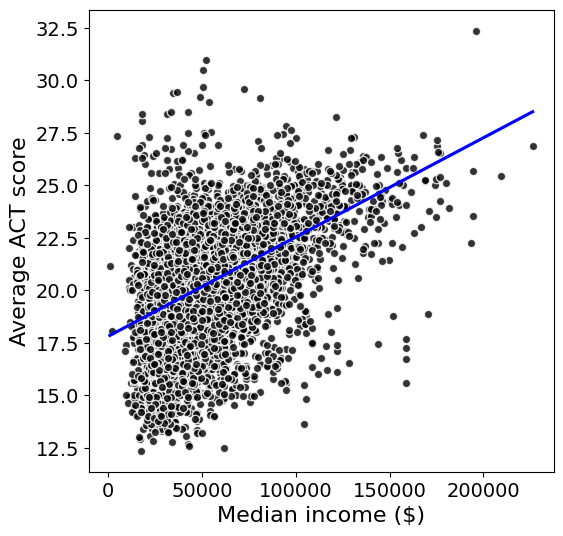

In [ ]:
plt.figure(figsize=(6, 6))

sns.regplot(
    data=df,
    x='median_income',
    y='average_act',
    color='blue',
    ci=False,
    scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
)

# Add axis labels
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()


Let's fit a simple linear regression model to see the relationship between median income to average ACT score

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model_median_income = smf.ols(
    formula='average_act ~ median_income', 
    data=df
).fit()

print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1934.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:04:23   Log-Likelihood:                -16043.
No. Observations:                7227   AIC:                         3.209e+04
Df Residuals:                    7225   BIC:                         3.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8026      0.063    284.794

- For every $10,000 increase in median household income, ACT scores increase by about 0.47 points
- Income alone explains 21.1% of the variation in ACT scores (R-squared = 0.211)
- This relationship is highly statistically significant (p < 0.001)

Basically, the household income has a clear positive effect on ACT performance, however, it only tell part of the story. The fact that nearly 79% of score variation remains unexplained suggests other important factors (like rate_unemployment, percent_college, percent_married,and percent_lunch) likely play a crucial roles in determining test scores.

### Evaluating the Fit
Numerical assessment of fit accuracy

R-squared

In [ ]:
model_median_income.rsquared

np.float64(0.2111864897930057)

The model shows that household income explains 21.1% of the variation in ACT scores. That means:
- While family income does influence test scores, about 79% of what determines a student's ACT performance comes from other factors not captured in this simple model





In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_hat = model_median_income.predict()
np.sqrt(mean_squared_error(df['average_act'], y_hat)).round(3)

np.float64(2.228)

Our income-based predictions of ACT scores are typically off by plus or minus 2.2 points, which is a substantial margin of error on the 36 point ACT scale. This further confirms that income alone is not a reliable predictor of academic performance.

In [ ]:
mean_absolute_error(df['average_act'], y_hat)

1.7129386980688617

When using only household income to predict ACT scores, our predictions are typically off by about 1.7 points

#### Use residual plot to assess model's fit

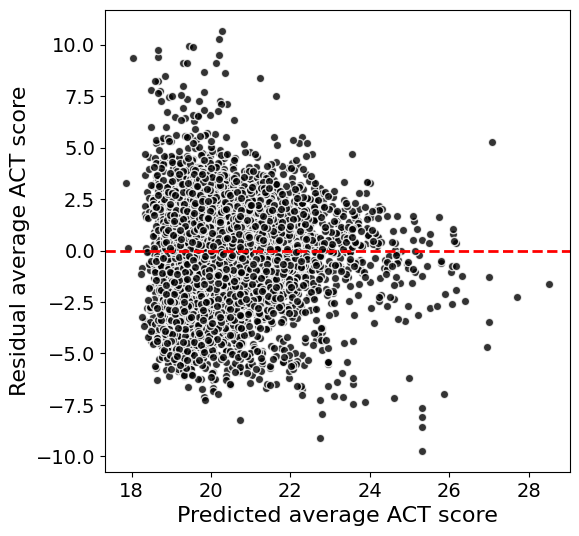

In [ ]:
plt.figure(figsize=(6, 6))

plt.plot(
    y_hat,
    model_median_income.resid,
    'ko',               # black circles
    mec='white',        # white edges
    alpha=0.8
)
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)
plt.tick_params(labelsize=14)

plt.show()

While our predictions are generally balanced (not consistently too high or low), they become less accurate when trying to predict ACT scores for schools at the extreme ends of the income spectrum. Most stable prediction is at the middle range (19 ish to 23)



#### Try quadratic model - Regression Curve against scatter plot

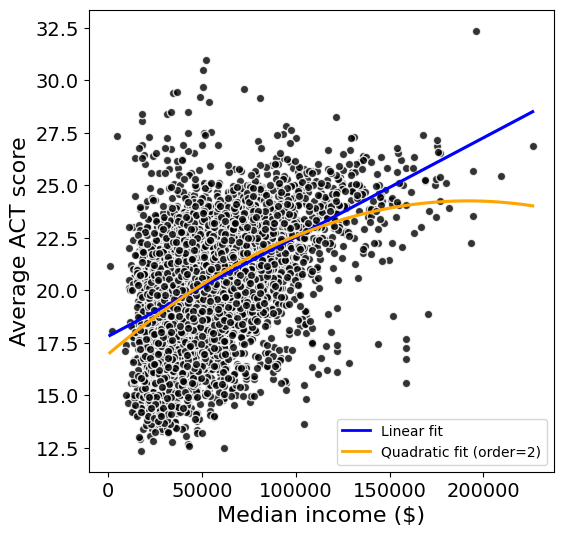

In [ ]:
from matplotlib.lines import Line2D

plt.figure(figsize=(6, 6))

# Scatter + linear fit
ax = sns.regplot(
    data=df,
    x='median_income',
    y='average_act',
    color='blue',
    ci=False,
    scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
)

# Quadratic fit only (no scatter)
sns.regplot(
    data=df,
    x='median_income',
    y='average_act',
    order=2,
    color='orange',
    ci=False,
    scatter=False,
    ax=ax
)

# Labels & ticks
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)
plt.tick_params(labelsize=14)

# Legend
plt.legend(
    handles=[
        Line2D([0], [0], color='blue', lw=2, label='Linear fit'),
        Line2D([0], [0], color='orange', lw=2, label='Quadratic fit (order=2)')
    ],
    loc='best'
)

plt.show()

- Blue line (Linear): Assumes each dollar increase in income has the same effect on ACT scores
- Orange line (Quadratic): Suggests income's effect diminishes at higher levels - more realistic since ACT scores can't keep rising indefinitely

In [ ]:
df['median_income_squared'] = df['median_income'] ** 2

# Then fit the model using the new column
model_median_income2 = smf.ols(
    formula='average_act ~ median_income + median_income_squared', 
    data=df
).fit()

print(model_median_income2.summary())


                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1013.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:04:23   Log-Likelihood:                -16007.
No. Observations:                7227   AIC:                         3.202e+04
Df Residuals:                    7224   BIC:                         3.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.94

The quadratic model shows that while higher median income initially leads to higher ACT scores (positive coefficient of 7.63e-05), this effect gradually diminishes at higher income levels (negative squared term of -1.99e-10), suggesting that beyond a certain income threshold, additional wealth has diminishing returns on academic performance.



#### Accessing model significance

In [ ]:
model_median_income2.pvalues

Intercept                0.000000e+00
median_income            2.631899e-99
median_income_squared    1.395848e-17
dtype: float64

The extremely small p-values (effectively zero) for both income terms tell us that the curved relationship between income and ACT scores is real and not due to chance, giving us high confidence that both the initial positive effect of income and its gradual leveling off at higher incomes are genuine patterns in the data.

In [ ]:
from statsmodels.stats.anova import anova_lm

anova_lm(model_median_income, model_median_income2)

df_resid           ssr  df_diff     ss_diff          F        Pr(>F)
0    7225.0  35865.012794      0.0         NaN        NaN           NaN
1    7224.0  35505.105960      1.0  359.906834  73.227974  1.395848e-17

The ANOVA test shows that adding the quadratic term (squared income) significantly improves our model's ability to predict ACT scores (p-value = 1.4e-17), confirming that the relationship between income and test scores is curved rather than strictly linear.

#### Accessing the model accuracy

compute the mean absolute error

In [ ]:
mean_absolute_error(df['average_act'], model_median_income2.predict())

1.6972389257968241

In [ ]:
mean_absolute_error(df['average_act'], model_median_income.predict())

1.7129386980688617

When using our curved (quadratic) model to predict ACT scores based on median income, our predictions are typically off by about 1.7 points, showing only a slight improvement over the simpler linear model's error of 1.7 points, despite the quadratic model better capturing the diminishing returns of income on test scores.



## Multiple Linear Regression
using all socioeconomics variable as independent (predictors)

In [ ]:
model = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_married + median_income + percent_lunch', 
    data=df
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2438.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:04:23   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.667e+04
Df Residuals:                    7221   BIC:                         2.671e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6972      0.13

This multiple regression model explains 62.8% of the variation in ACT scores (much better than income alone at 21.1%), with free/reduced lunch eligibility and college-educated adults in the community being the strongest predictors, while surprisingly, median income and married-couple families show no significant impact once other factors are accounted for.



#### Using residual plot for assessing model fit

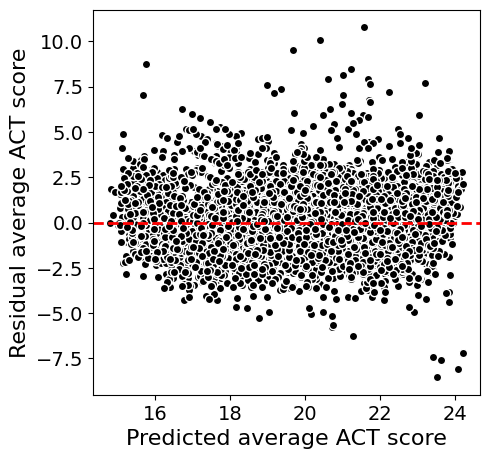

In [ ]:
y_hat = model.predict()

plt.figure(figsize=(5, 5))
plt.plot(y_hat, model.resid, 'ko', mec='w')   # black points with white edges
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)
plt.tick_params(labelsize=14)

plt.show()

The residual plot shows our multiple regression model's predictions are fairly balanced around zero but have more variability at extreme ACT scores, similar to what we saw with the income-only model, though this model's overall predictions are more accurate since it accounts for multiple socioeconomic factors rather than just income.



#### computing the mean absolute error

In [ ]:
mean_absolute_error(df['average_act'], model.predict())

1.1453304788871002

When using multiple socioeconomic factors to predict ACT scores, our predictions are typically off by about 1.1 points. This is a significant improvement over using income alone (which was off by 1.7 points), showing that considering multiple community factors gives us a more accurate picture of academic performance.


## Fit a reduced model with the significant predictors

Previously, in the full model, median income and percent married variables showed weak or insignificant p-values, suggesting they weren't contributing meaningful unique information once other factors were accounted for. Some removed variables like median income were strongly correlated with other predictors (e.g., college education rates), hence, shows sign of multicollinearity

This reduced model focuses on just three key factors that showed strong relationships with ACT scores: unemployment rates, college education levels in the community, and free/reduced lunch eligibility, while dropping less influential variables like income and family structure to create a more streamlined prediction model.




In [ ]:
model_reduced_v2 = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_lunch', 
    data=df
).fit()

print(model_reduced_v2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:04:24   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6400      0.10

In [ ]:
model_reduced = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_lunch', 
    data=df
).fit()

In [ ]:
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:04:24   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6400      0.10

The simplified model using just three factors (unemployment, college education, and free lunch eligibility) explains 62.8% of differences in ACT scores, showing that higher unemployment and more students on free lunch predict lower scores, while having more college-educated adults in the community predicts higher scores - with free lunch status having the strongest effect, as a 100% increase in eligible students corresponds to a 7.6-point drop in ACT scores.



#### Residual Plot

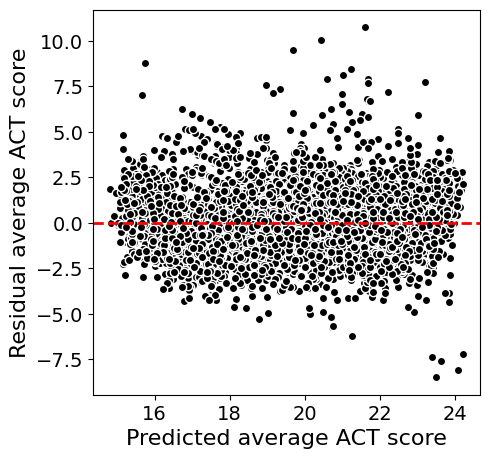

In [ ]:
y_hat = model_reduced.predict()  

plt.figure(figsize=(5, 5))
plt.plot(y_hat, model_reduced.resid, 'ko', mec='w')   # black dots w/ white edge
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)
plt.tick_params(labelsize=14)

plt.show()

The residual plot from our simplified three-factor model looks very similar to our previous model that used five factors, confirming that we can predict ACT scores just as accurately using only unemployment rate, college education levels, and free lunch eligibility, while dropping income and family structure from our analysis.

##### Computing the mean absolute error

In [ ]:
mean_absolute_error(df['average_act'], model_reduced.predict())

1.1454832950346427

Our streamlined model using just three key factors (unemployment, college education, and free lunch rates) can predict a school's ACT scores within about 1.1 points on average, which is just as accurate as the more complex model that included additional socioeconomic variables.


#### Comparing accuracy between models

In [ ]:
# MAE
mae_full    = mean_absolute_error(df['average_act'], model.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

# R-squared from statsmodels results
r2_full    = model.rsquared
r2_reduced = model_reduced.rsquared

# Summary table
summary = (
    pd.DataFrame(
        {
            'Mean Absolute Error': [mae_full, mae_reduced],
            'R-squared': [r2_full, r2_reduced],
        },
        index=['full model', 'reduced model']
    ).round(4)
)

summary

Mean Absolute Error  R-squared
full model                  1.1453     0.6280
reduced model               1.1455     0.6279

Both models perform nearly identically, with prediction errors of about 1.15 ACT points and explaining about 63% of score variations, showing we can get equally accurate predictions using just three key factors (unemployment, college education, and free lunch rates) instead of the more complex five-factor model.



#### Use an ANOVA to test the significance of difference between models

In [ ]:
anova_lm(model_reduced, model)

df_resid           ssr  df_diff   ss_diff         F    Pr(>F)
0    7223.0  16916.619167      0.0       NaN       NaN       NaN
1    7221.0  16915.612457      2.0  1.006711  0.214874  0.806648

## Scale model with standardized predictors

We scale predictor variables such that we have mean of 0 and standard deviation of 1

In [ ]:
from sklearn.preprocessing import StandardScaler

predictor_variables = ['rate_unemployment', 'percent_college', 'percent_lunch']

scaled_columns = [var + '_normalized' for var in predictor_variables]
print(scaled_columns)

scaler = StandardScaler().fit(df[predictor_variables])
df[scaled_columns] = scaler.transform(df[predictor_variables])


['rate_unemployment_normalized', 'percent_college_normalized', 'percent_lunch_normalized']


By standardizing these variables (making them all have a mean of 0 and standard deviation of 1), we can directly compare how strongly each factor influences ACT scores on an equal scale, since the original variables were measured in different units (percentages and rates). This makes it easier to understand which socioeconomic factors have the biggest impact on student performance.



#### Checking the mean and standard deviation of the transformed data

In [ ]:
df[scaled_columns].agg(['mean', 'std']).round(3)

rate_unemployment_normalized  percent_college_normalized  \
mean                           0.0                        -0.0   
std                            1.0                         1.0   

      percent_lunch_normalized  
mean                      -0.0  
std                        1.0

The standardization was successful, as each socioeconomic factor now has a mean of 0 and standard deviation of 1, confirming that we've put unemployment rates, college education levels, and free lunch percentages on the same scale so we can fairly compare their relative impacts on ACT scores.



#### Fitting the multiple linear regression model with standardized predictors

In [ ]:
model_normalized = smf.ols(
    formula='average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized',
    data=df
).fit()

print(model_normalized.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:04:24   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

After standardizing our variables for fair comparison, the results show that free/reduced lunch eligibility has the strongest impact on ACT scores (coefficient -1.78), about 6 times stronger than college education levels (0.28) and 14 times stronger than unemployment rates (-0.12), while the model explains about 63% of the variation in test scores across schools.



In [ ]:
# MAE
mae_normalized = mean_absolute_error(df['average_act'], model_normalized.predict())
mae_reduced    = mean_absolute_error(df['average_act'], model_reduced.predict())

# R-squared (statsmodels results)
r2_normalized = model_normalized.rsquared
r2_reduced    = model_reduced.rsquared

# Summary table
pd.DataFrame(
    {
        'Mean Absolute Error': [mae_normalized, mae_reduced],
        'R-squared': [r2_normalized, r2_reduced]
    },
    index=['normalized model', 'reduced model']
).round(4)

Mean Absolute Error  R-squared
normalized model               1.1455     0.6279
reduced model                  1.1455     0.6279

The normalized and reduced models perform identically, both predicting ACT scores within about 1.15 points on average and explaining about 63% of score variations, confirming that standardizing our variables doesn't change the model's accuracy but makes it easier to compare the relative importance of each factor.



# Ethical Consideration

Our analysis raises important ethical concerns: While we accurately identified socioeconomic factors affecting ACT scores, we may be reinforcing systemic inequalities by focusing heavily on economic indicators. We lack important perspectives like student experiences, school resources, and cultural factors that could provide a more complete picture. This is where I want to merge my additional education inequality dataset to this current dataset to further explore these lack perspective. Additionally, while our model is statistically sound and transparent, showing free lunch eligibility as the strongest predictor of ACT performance, this finding could inadvertently stigmatize low-income students if not communicated carefully with appropriate context about systemic barriers and the complex nature of educational achievement.

# Evaluation | Education

Based on our analysis, we successfully identified key socioeconomic factors affecting ACT scores, with our model explaining about 63% of score variations. The percentage of students eligible for free/reduced lunch emerged as the strongest predictor, by having nearly 6 times more impact than college education levels in the community and 14 times more than unemployment rates. This suggests that immediate economic hardship (measured by lunch program eligibility) has a more direct impact on student performance than general community wealth (measured by median income), possibly because it better captures day-to-day financial challenges facing students and their families.



# Additional Data Analysis

We lack important perspectives like student experiences, school resources, and cultural factors that could provide a more complete picture.

I chosen:
The CRDC 2015-16 dataset is your strongest option. It covers virtually every public school in the country and contains rich variables about educational equity and access that would complement your socioeconomic analysis perfectly.
What it includes:

- Disciplinary actions (suspensions, expulsions) by demographic group
- Advanced coursework offerings (AP, IB courses)
- Access to STEM courses and programs
- School climate and safety indicators (bullying, harassment incidents)
- Teacher qualifications and experience levels
- Class sizes and student-teacher ratios
- Enrichment programs (gifted programs, music, art)


I believe this would further explain us the other important perspectives and works well with our current dataset because:

The 2015-16 school year is adjacent to your 2016-17 data, making it temporally compatible for analysis. The dataset uses NCESSCH identifiers that will match directly with our existing school IDs. Most importantly, the variables add meaningful predictors related to school resources, climate, and equity that could plausibly affect academic performance alongside socioeconomic factors.

## Data Collection
Here is where I download the data and manual pdf explaining the dataset in more detail:
1. Link to direct download: https://www.ed.gov/about/offices/list/ocr/docs/2015-16-crdc-data.zip
2. The Public-Use Data File User's Manual: https://ocrdata.ed.gov/assets/downloads/Public-Use-Data-File-Manual-2015-16.pdf


### Recap:
Previously, our strongest predictor measures the concentration of poverty within a school, not individual student poverty. Specifically, it is the percentage of students at each school who are eligible for free or reduced-price lunch. This explains:

- Our strongest predictor implies school-level poverty concentration, meaing the percent of students eligible for free/reduced-price lunch (FRPL) at a school indicates that our result is correlational (not causal); regarding our intuition that schools with higher percent_lunch tend to report lower average ACT scores, consistent with institutional mechanisms—fewer advanced courses (AP/IB/Calculus), higher absenteeism and discipline interruptions, and challenges staffing experienced teachers and counselors. This points to systemic differences in resources and opportunities, not deficits in students. (free and reduced lunch price is a strong proxy but imperfect for us explaining the ACT scores in fuller picture)



## Additional Research Question

What being said in the Recap section:
- One plausible mechanism is differential access to college-preparatory coursework. Schools serving predominantly low-income students may offer fewer Advanced Placement courses, less access to calculus and advanced mathematics, and reduced availability of other rigorous academic opportunities. If this pattern exists, students in high-poverty schools face structural barriers to developing the advanced skills and knowledge that standardized tests like the ACT measure, regardless of their individual capabilities or motivation.

- We will select variables, such that, we can directly tests whether unequal distribution of advanced coursework serves as a mediating variable between poverty concentration and test performance. In statistical terms, we want to ask whether some portion of the relationship between school-level poverty and ACT scores can be explained by the fact that high-poverty schools systematically provide fewer opportunities for students to engage with college-level content. If our analysis confirms this pattern, it reveals that the achievement gap reflects institutional inequalities in resource allocation rather than simply the socioeconomic status we analyzed in the beginning


## Understanding the Variable and Data Structure

Let' understand the dataset to see which variable we have and how we can come up with a personalized research question and how to best answer it

In [ ]:
additional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96360 entries, 0 to 96359
Columns: 1836 entries, LEA_STATE to SCH_JJPART_OV180
dtypes: float64(31), int64(1740), object(65)
memory usage: 1.3+ GB


In [ ]:
additional_df

LEA_STATE LEA_STATE_NAME    LEAID  \
0            AL        ALABAMA   100002   
1            AL        ALABAMA   100002   
2            AL        ALABAMA   100002   
3            AL        ALABAMA   100002   
4            AL        ALABAMA   100005   
...         ...            ...      ...   
96355        WY        WYOMING  5680250   
96356        WY        WYOMING  5680251   
96357        WY        WYOMING  5680251   
96358        WY        WYOMING  5680252   
96359        WY        WYOMING  5680254   

                                                LEA_NAME  SCHID  \
0                                 Alabama Youth Services   1705   
1                                 Alabama Youth Services   1706   
2                                 Alabama Youth Services   1876   
3                                 Alabama Youth Services  99995   
4                                       Albertville City    870   
...                                                  ...    ...   
96355                                     Region V BOCES     48   
96356              Wyoming Department of Family Services    534   
96357              Wyoming Department of Family Services    538   
96358  Youth Emergency Services Inc. - Administration...    350   
96359         Saint Stephen's Indian School Admin Office    549   

                            SCH_NAME        COMBOKEY   JJ SCH_GRADE_PS  \
0      Wallace Sch - Mt Meigs Campus     10000201705  Yes           No   
1          McNeel Sch - Vacca Campus     10000201706  Yes           No   
2             Alabama Youth Services     10000201876   No           No   
3                     AUTAUGA CAMPUS     10000299995  Yes           No   
4          Albertville Middle School     10000500870   No           No   
...                              ...             ...  ...          ...   
96355                  C-Bar-V Ranch  568025000000.0   No           No   
96356           Wyoming Girls School  568025000000.0  Yes           No   
96357            Wyoming Boys School  568025000000.0  Yes           No   
96358  Youth Emergency Services Inc.  568025000000.0   No           No   
96359  Saint Stephen's Indian School  568025000000.0   No           No   

      SCH_GRADE_KG SCH_GRADE_G01 SCH_GRADE_G02 SCH_GRADE_G03 SCH_GRADE_G04  \
0               No            No            No            No            No   
1               No            No            No            No            No   
2               No            No            No            No            No   
3               No            No            No            No            No   
4               No            No            No            No            No   
...            ...           ...           ...           ...           ...   
96355           No            No            No           Yes           Yes   
96356           No            No            No            No            No   
96357           No            No            No            No            No   
96358           No            No            No            No            No   
96359          Yes           Yes           Yes           Yes           Yes   

      SCH_GRADE_G05 SCH_GRADE_G06 SCH_GRADE_G07 SCH_GRADE_G08 SCH_GRADE_G09  \
0                No           Yes           Yes           Yes           Yes   
1                No           Yes           Yes           Yes           Yes   
2                No           Yes           Yes           Yes           Yes   
3               Yes           Yes           Yes           Yes           Yes   
4                No            No           Yes           Yes            No   
...             ...           ...           ...           ...           ...   
96355           Yes           Yes           Yes           Yes           Yes   
96356            No            No            No            No           Yes   
96357            No            No           Yes           Yes           Yes   
96358            No            No            No           Yes       

There seems to be no visible missing value, however, there some odds negative value like -2, -9, etc

Exploring the column names:

In [ ]:
print(additional_df.columns.tolist())

['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME', 'COMBOKEY', 'JJ', 'SCH_GRADE_PS', 'SCH_GRADE_KG', 'SCH_GRADE_G01', 'SCH_GRADE_G02', 'SCH_GRADE_G03', 'SCH_GRADE_G04', 'SCH_GRADE_G05', 'SCH_GRADE_G06', 'SCH_GRADE_G07', 'SCH_GRADE_G08', 'SCH_GRADE_G09', 'SCH_GRADE_G10', 'SCH_GRADE_G11', 'SCH_GRADE_G12', 'SCH_GRADE_UG', 'SCH_UGDETAIL_ES', 'SCH_UGDETAIL_MS', 'SCH_UGDETAIL_HS', 'SCH_STATUS_SPED', 'SCH_STATUS_MAGNET', 'SCH_STATUS_CHARTER', 'SCH_STATUS_ALT', 'SCH_MAGNETDETAIL', 'SCH_ALTFOCUS', 'SCH_PSENR_NONIDEA_A3', 'SCH_PSENR_NONIDEA_A4', 'SCH_PSENR_NONIDEA_A5', 'SCH_PSENR_HI_M', 'SCH_PSENR_HI_F', 'SCH_PSENR_AM_M', 'SCH_PSENR_AM_F', 'SCH_PSENR_AS_M', 'SCH_PSENR_AS_F', 'SCH_PSENR_HP_M', 'SCH_PSENR_HP_F', 'SCH_PSENR_BL_M', 'SCH_PSENR_BL_F', 'SCH_PSENR_WH_M', 'SCH_PSENR_WH_F', 'SCH_PSENR_TR_M', 'SCH_PSENR_TR_F', 'TOT_PSENR_M', 'TOT_PSENR_F', 'SCH_PSENR_LEP_M', 'SCH_PSENR_LEP_F', 'SCH_PSENR_IDEA_M', 'SCH_PSENR_IDEA_F', 'SCH_ENR_HI_M', 'SCH_ENR_HI_F', 'SCH_ENR_AM_M', 'SC

I've look through the variable dictionary, I've narrow down these variable we can use to answer this hypothesis:

#### **Do schools serving higher percentages of economically disadvantaged students offer fewer advanced academic opportunities, and does differential access to college-preparatory coursework help explain the relationship between low income concentrated institutions and ACT scores?**

Merge key

  - `COMBOKEY` — unique school ID in CRDC (match to your `id`)

Advanced coursework access

  - `SCH_APENR_IND` — AP offered (indicator)
  - `SCH_APCOURSES` — # of AP courses offered
  - `TOT_APENR_M`, `TOT_APENR_F` — AP enrollment (male/female totals)
  - `SCH_IBENR_IND` — IB offered (indicator)
  - `SCH_GT_IND` — Gifted & Talented program offered (indicator)

Advanced mathematics access

  - `SCH_MATHCLASSES_CALC` — # of Calculus classes
  - `SCH_MATHCLASSES_ALG2` — # of Algebra II classes
  - `TOT_MATHENR_CALC_M`, `TOT_MATHENR_CALC_F` — Calculus enrollment (male/female totals)

Disciplinary climate

  - `TOT_DISCWODIS_ISS_M`, `TOT_DISCWODIS_ISS_F` — In-school suspensions (counts)
  - `TOT_DISCWODIS_SINGOOS_M`, `TOT_DISCWODIS_SINGOOS_F` — Out-of-school suspensions, single or more (counts)

Teacher/staffing resources

  - `SCH_FTETEACH_TOT` — Total FTE teachers
  - `SCH_FTETEACH_CERT` — Certified FTE teachers
  - `SCH_FTECOUNSELORS` — FTE counselors

Chronic absenteeism

  - `TOT_ABSENT_M`, `TOT_ABSENT_F` — Students chronically absent (male/female totals)

### Why I chose those variable?


These variables are essential for understanding how school-level resources and opportunities impact ACT performance, particularly in schools with concentrated poverty (percent_lunch - percentage of student eligible for free or reduced-price lunch at each school).

- Merge Key (COMBOKEY): This ensures accurate linking between datasets, matching schools in your current data with the CRDC data.

- Advanced Coursework Access: Variables like AP/IB course offerings and enrollment (e.g., SCH_APENR_IND, SCH_APCOURSES) measure whether schools provide college-preparatory opportunities and whether students access them.

- Advanced Mathematics Access: Variables like calculus and algebra course offerings (SCH_MATHCLASSES_CALC, SCH_MATHCLASSES_ALG2) assess access to higher-level math, critical for ACT success and college readiness.

- Disciplinary Climate: Suspension data (TOT_DISCWODIS_ISS_M, TOT_DISCWODIS_SINGOOS_M) reflects school environments, as punitive practices often correlate with poverty and disrupt learning.

- Teacher Resources: Metrics like certified teachers (SCH_FTETEACH_CERT) and counselors (SCH_FTECOUNSELORS) highlight staffing quality and support for college preparation.

- Chronic Absenteeism: Attendance data (TOT_ABSENT_M, TOT_ABSENT_F) captures engagement, as absenteeism often reflects broader school challenges.



## Load Data Set For Data Inspection and Data Preparation

In [ ]:
cleaned_df = pd.read_csv(
    '../data/education_clean.csv')

load additional data:

In [ ]:
crdc_df = pd.read_csv('../data/CRDC_2015-16_School_Data.csv', encoding='latin1', low_memory=False, dtype={'COMBOKEY': str})

I suspected that COMEBOKEY is the right key to merge, however, it is poorly formatted

In [ ]:

print(crdc_df['COMBOKEY'].dtype, crdc_df['COMBOKEY'].head())

ck = (crdc_df['COMBOKEY'].astype(str)
        .str.replace(r'\.0$','',regex=True)
        .str.strip())

print('len==12 %:', (ck.str.len()==12).mean())
print('digits-only %:', ck.str.fullmatch(r'\d{12}').mean())
print('unique rate:', ck.nunique()/len(ck))

# 3) Rebuild canonical key and compare
LEA = crdc_df['LEAID'].astype(str).str.replace(r'\.0$','',regex=True).str.zfill(7)
SCH = crdc_df['SCHID'].astype(str).str.replace(r'\.0$','',regex=True).str.zfill(5)
canon = LEA + SCH

# how many COMBOKEY == canonical (after normalizing COMBOKEY)?
ck_norm = ck.str.zfill(12)
print('COMBOKEY matches canonical %:', (ck_norm==canon).mean())


object 0    10000201705
1    10000201706
2    10000201876
3    10000299995
4    10000500870
Name: COMBOKEY, dtype: object
len==12 %: 0.0062266500622665
digits-only %: 0.0007783312577833125
unique rate: 0.3048360315483603
COMBOKEY matches canonical %: 0.19018264840182647


yes, it is poorly formatted!

Basically, COMBOKEY is the right key, but in your loaded dataframe it’s formatted badly (likely read as numbers, lost leading zeros, “.0” artifacts, stray characters). That’s why it didn’t match with education cleaned dataset, let see in the next example


#### Example: Attempting to Left-join ID using COMBOKEY

You will see that the id doesn't match because of the mismatched format we analyzed earlier, we will require to further reconstruction of the ID from column LEAID and SCHID

In [ ]:
# Rename CRDC variables to descriptive names
crdc_df_test = crdc_df.rename(columns={
    'SCH_APENR_IND': 'has_ap_program',
    'SCH_APCOURSES': 'num_ap_courses',
    'TOT_APENR_M': 'ap_enrollment_male',
    'TOT_APENR_F': 'ap_enrollment_female',
    'SCH_IBENR_IND': 'has_ib_program',
    'SCH_GT_IND': 'has_gifted_program',
    'SCH_MATHCLASSES_CALC': 'num_calculus_classes',
    'SCH_MATHCLASSES_ALG2': 'num_algebra2_classes',
    'TOT_MATHENR_CALC_M': 'calculus_enrollment_male',
    'TOT_MATHENR_CALC_F': 'calculus_enrollment_female',
    'TOT_DISCWODIS_ISS_M': 'in_school_suspension_male',
    'TOT_DISCWODIS_ISS_F': 'in_school_suspension_female',
    'TOT_DISCWODIS_SINGOOS_M': 'out_school_suspension_male',
    'TOT_DISCWODIS_SINGOOS_F': 'out_school_suspension_female',
    'SCH_FTETEACH_TOT': 'num_teachers_fte',
    'SCH_FTETEACH_CERT': 'num_teachers_certified',
    'SCH_FTECOUNSELORS': 'num_counselors_fte',
    'TOT_ABSENT_M': 'chronic_absent_male',
    'TOT_ABSENT_F': 'chronic_absent_female'
})
# Handle CRDC reserve and missing value codes
def to_str_id(series):
    """Convert ID column to string format, removing decimal points"""
    return series.astype(str).str.replace(r"\.0$", "", regex=True).str.strip()

# Rename merge key
crdc_df_test = crdc_df_test.rename(columns={'COMBOKEY': 'id_crdc'})

# Convert ID to string format to match education_clean format
crdc_df_test['id_crdc'] = to_str_id(crdc_df_test['id_crdc'])

# Ensure the merge key format matches in education_df
cleaned_df['id'] = cleaned_df['id'].astype(str)

# Merge CRDC data with existing education dataset
df_merged_test = cleaned_df.merge(
    crdc_df_test,
    how='left',
    left_on='id',
    right_on='id_crdc'
)

# Drop the redundant id_crdc column after merge
df_merged_test = df_merged_test.drop(columns=['id_crdc'])

# Check merge success
print(f"Original education dataset rows: {len(cleaned_df)}")
print(f"Merged dataset rows: {len(df_merged_test)}")
print(f"Schools with CRDC data: {df_merged_test['has_ap_program'].notna().sum()}")
print(f"Match rate: {(df_merged_test['has_ap_program'].notna().sum() / len(df_merged_test) * 100):.1f}%")

Original education dataset rows: 7227
Merged dataset rows: 7227
Schools with CRDC data: 0
Match rate: 0.0%


The 0% match happened because you merged on COMBOKEY, which doesn’t line up with our previous id from cleaned education dataset (ed gap + school information) (12-digit NCESSCH)




Let's check if id from cleaned education dataset proper formatted:




In [ ]:
# sanity checks on your existing ID
id_s = cleaned_df['id'].astype(str).str.strip()

print("len==12 %:", (id_s.str.len()==12).mean())
print("digits-only %:", id_s.str.fullmatch(r'\d{12}').mean())

# if both are 1.0, you can safely skip making id12
# optional: prove id == id12 normalization gives same value
id12_test = id_s.str.replace(r'\.0$','',regex=True).str.zfill(12)
print("id equals normalized id12 %:", (id_s == id12_test).mean())


len==12 %: 1.0
digits-only %: 1.0
id equals normalized id12 %: 1.0


To fix that, we rebuilt the official 12-digit NCES school ID in the CRDC file (padding the district ID to 7 digits and the school ID to 5, then concatenating), made our existing IDs the same 12-digit string, and then did a **left join** from our education file to CRDC.

In [ ]:
# creating the 12-digit NCESSCH in CRDC (LEAID 7d + SCHID 5d)
crdc_df['LEAID_str'] = crdc_df['LEAID'].astype(str).str.replace(r'\.0$','',regex=True).str.zfill(7)
crdc_df['SCHID_str'] = crdc_df['SCHID'].astype(str).str.replace(r'\.0$','',regex=True).str.zfill(5)
crdc_df['ncessch12'] = crdc_df['LEAID_str'] + crdc_df['SCHID_str']

# 3) Left-merge with indicator to measure *actual* matches
df_merged = cleaned_df.merge(
    crdc_df,
    how='left',
    left_on='id',
    right_on='ncessch12',
    indicator=True
)


1. I converted the district (LEAID) and school (SCHID) IDs into strings, removes any trailing ".0" (from being read as floats), and ensures they are zero-padded to 7 and 5 digits, respectively, to standardize their format for merging or analysis.

2. The indicator=True parameter in the merge adds a column (_merge) to show whether each row exists in both datasets, only in the left dataset, or only in the right dataset. This code later uses to evaluate the success of the merge and identify unmatched rows for further analysis. 

#### Checking the Merge Quality -- Let's check if all ID matched

Let's check how well two datasets were combined by verifying if school IDs matched correctly. It calculates the percentage of successful matches, identifies unmatched rows, and examines patterns in the unmatched data (like state or school type). It also flags rows with successful matches and ensures the merge worked as expected.


In [ ]:
# Calculate the percentage of rows that successfully matched between the two datasets
true_match_rate = (df_merged['_merge'] == 'both').mean() * 100
print(f"Education rows: {len(cleaned_df):,}")  # Total rows in the education dataset
print(f"Merged rows:    {len(df_merged):,}")   # Total rows in the merged dataset
print(df_merged['_merge'].value_counts())    # Count of rows that matched, unmatched, or exist only in one dataset

# the percentage of rows that matched successfully
print(f"\nTRUE match rate (from merge indicator): {true_match_rate:.1f}%")

# Create a new column to flag rows that successfully matched with CRDC data (1 for matched, 0 for unmatched)
df_merged['has_crdc'] = (df_merged['_merge'] == 'both').astype(int)

# For unmatched rows, look at patterns in their attributes (e.g., state, school type, school level, charter status)
unmatched = df_merged[df_merged['has_crdc'] == 0]
unmatched[['state', 'school_type', 'school_level', 'charter']].value_counts().head(10)

Education rows: 7,227
Merged rows:    7,227
_merge
both          6921
left_only      306
right_only       0
Name: count, dtype: int64

TRUE match rate (from merge indicator): 95.8%


state  school_type     school_level  charter       
NY     Regular School  High          No                287
MA     Regular School  High          Yes                 3
FL     Regular School  High          No                  2
MI     Regular School  High          No                  2
OH     Regular School  High          No                  2
DE     Regular School  High          No                  1
GA     Regular School  High          No                  1
LA     Regular School  High          Not applicable      1
MA     Regular School  High          No                  1
MI     Regular School  High          Yes                 1
Name: count, dtype: int64


TRUE Match Rate (from merge indicator):
- This measures the percentage of rows in the merged dataset where the _merge column is 'both', meaning the school ID exists in both datasets. This indicates a successful match based on the merge key (id in cleaned_df and ncessch12 in crdc_df).

The pattern is striking: 287 out of 306 unmatched are New York schools (93.8% of failures). This suggests NY schools either:

- Use different identifier systems
- Weren't included in CRDC 2015-16
- Have data quality issues in the CRDC


#### In short

We made the two datasets “speak the same language” for school IDs. Specifically, we rebuilt the official 12-digit NCES school ID inside the CRDC file (district ID zero-padded to 7 digits + school ID zero-padded to 5), removed duplicates on that key, formatted our existing IDs the same way, and then merged the CRDC info onto our education file using a left join. Finally, we checked how many schools actually matched to confirm the merge worked.


#### Selecting Columns of Interests and Renaming for Readability

In [ ]:
# selecting relevant CRDC columns for analysis
analysis_columns = [
    'ncessch12',  # in case we need this, keeping the merge key for reference
    # Advanced coursework access
    'SCH_APENR_IND',
    'SCH_APCOURSES', 
    'TOT_APENR_M',
    'TOT_APENR_F',
    'SCH_IBENR_IND',
    'SCH_GT_IND',
    # Advanced mathematics
    'SCH_MATHCLASSES_CALC',
    'SCH_MATHCLASSES_ALG2',
    'TOT_MATHENR_CALC_M',
    'TOT_MATHENR_CALC_F',
    # Disciplinary climate
    'TOT_DISCWODIS_ISS_M',
    'TOT_DISCWODIS_ISS_F',
    'TOT_DISCWODIS_SINGOOS_M',
    'TOT_DISCWODIS_SINGOOS_F',
    # Teacher qualifications
    'SCH_FTETEACH_TOT',
    'SCH_FTETEACH_CERT',
    'SCH_FTECOUNSELORS',
    # Chronic absenteeism
    'TOT_ABSENT_M',
    'TOT_ABSENT_F',
    'TOT_ENR_M',
    'TOT_ENR_F'
]

# we are keeping only selected CRDC columns from the merged dataset
crdc_subset = df_merged[analysis_columns].copy()

# we need to change the CRDC missing/reserve codes with NaN
reserve_missing = [-2, -5, -6, -7, -8, -9]
crdc_subset = crdc_subset.replace(reserve_missing, np.nan)

# combining with the education data columns
final_columns = (
    cleaned_df.columns.tolist() + 
    [col for col in analysis_columns if col != 'ncessch12']  # Don't duplicate the key
)

# final merged dataset
df_final = cleaned_df.copy()
for col in analysis_columns:
    if col != 'ncessch12':
        df_final[col] = crdc_subset[col]

print(f"Final dataset shape: {df_final.shape}")
print(f"\nColumns added from CRDC: {len(analysis_columns) - 1}")
print(f"\nMissing data summary for CRDC variables:")
print(df_final[analysis_columns[1:]].isna().sum())

Final dataset shape: (7227, 34)

Columns added from CRDC: 21

Missing data summary for CRDC variables:
SCH_APENR_IND               306
SCH_APCOURSES              1409
TOT_APENR_M                1409
TOT_APENR_F                1409
SCH_IBENR_IND               306
SCH_GT_IND                  306
SCH_MATHCLASSES_CALC        321
SCH_MATHCLASSES_ALG2        321
TOT_MATHENR_CALC_M         1490
TOT_MATHENR_CALC_F         1490
TOT_DISCWODIS_ISS_M         318
TOT_DISCWODIS_ISS_F         318
TOT_DISCWODIS_SINGOOS_M     318
TOT_DISCWODIS_SINGOOS_F     318
SCH_FTETEACH_TOT            307
SCH_FTETEACH_CERT           307
SCH_FTECOUNSELORS           307
TOT_ABSENT_M                318
TOT_ABSENT_F                318
TOT_ENR_M                   306
TOT_ENR_F                   306
dtype: int64


Our merged dataset contained 34 variables covering socioeconomic context, school characteristics, and institutional
resources.

Note that the string '-9' or '-2', etc in the object columns wasn't caught because we were looking for the integer -9, not the string '-9', hence, expect any reservation number in object column won't turn to NaN


## Data Imputer

Becareful, later in the modelling process, I came across an error hat when I imputed missing num_ap_courses values, the regression-based imputer can predict any number - including negatives. One school probably got predicted as -0.3 AP courses. Basically, because IterativeImputer uses linear regression on OTHER variables to predict missing values.
Example:
- School has: very small size, very high poverty, few teachers
- Linear model extrapolates: "This school should have -0.3 AP courses"

The regression doesn't know AP courses must be ≥ 0. It just follows the linear trend. Hence, I came back to this step and clipped all the predicted negative value to 0. This is standard practice in data sience.






In [ ]:
# choose all CRDC numerical columns for imputation
crdc_numerical = [
    'SCH_APCOURSES', 
    'TOT_APENR_M',
    'TOT_APENR_F',
    'SCH_MATHCLASSES_CALC',
    'SCH_MATHCLASSES_ALG2',
    'TOT_MATHENR_CALC_M',
    'TOT_MATHENR_CALC_F',
    'TOT_DISCWODIS_ISS_M',
    'TOT_DISCWODIS_ISS_F',
    'TOT_DISCWODIS_SINGOOS_M',
    'TOT_DISCWODIS_SINGOOS_F',
    'SCH_FTETEACH_TOT',
    'SCH_FTETEACH_CERT',
    'SCH_FTECOUNSELORS',
    'TOT_ABSENT_M',
    'TOT_ABSENT_F',
    'TOT_ENR_M',
    'TOT_ENR_F'
]

# initializing a fitting imputer object
imputer = IterativeImputer()
imputer.fit(df_final[crdc_numerical])

# transform
df_final[crdc_numerical] = imputer.transform(df_final[crdc_numerical])

df_final[crdc_numerical] = df_final[crdc_numerical].clip(lower=0)

# double check missing value
print("Missing values after imputation:")
print(df_final[crdc_numerical].isna().sum())

Missing values after imputation:
SCH_APCOURSES              0
TOT_APENR_M                0
TOT_APENR_F                0
SCH_MATHCLASSES_CALC       0
SCH_MATHCLASSES_ALG2       0
TOT_MATHENR_CALC_M         0
TOT_MATHENR_CALC_F         0
TOT_DISCWODIS_ISS_M        0
TOT_DISCWODIS_ISS_F        0
TOT_DISCWODIS_SINGOOS_M    0
TOT_DISCWODIS_SINGOOS_F    0
SCH_FTETEACH_TOT           0
SCH_FTETEACH_CERT          0
SCH_FTECOUNSELORS          0
TOT_ABSENT_M               0
TOT_ABSENT_F               0
TOT_ENR_M                  0
TOT_ENR_F                  0
dtype: int64


/opt/homebrew/Cellar/jupyterlab/4.4.7/libexec/lib/python3.13/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



All the numerical value get imputer, what about object (yes and no)? Let's convert these value to 1 and 0 for imputation:

In [ ]:
# Check their current values
print(df_final[['SCH_APENR_IND', 'SCH_IBENR_IND', 'SCH_GT_IND']].head(10))
print("\nValue counts:")
for col in ['SCH_APENR_IND', 'SCH_IBENR_IND', 'SCH_GT_IND']:
    print(f"\n{col}:")
    print(df_final[col].value_counts(dropna=False))

  SCH_APENR_IND SCH_IBENR_IND SCH_GT_IND
0           Yes            No         No
1           Yes            No         No
2           Yes            No         No
3           Yes            No         No
4           Yes            No         No
5           Yes            No        Yes
6           Yes            No         No
7           Yes            No         No
8           Yes            No         No
9           Yes            No         No

Value counts:

SCH_APENR_IND:
SCH_APENR_IND
Yes    5818
No     1089
NaN     306
-9       14
Name: count, dtype: int64

SCH_IBENR_IND:
SCH_IBENR_IND
No     6505
Yes     402
NaN     306
-9       14
Name: count, dtype: int64

SCH_GT_IND:
SCH_GT_IND
Yes    4350
No     2571
NaN     306
Name: count, dtype: int64


As we analyzed correctly ealier, some reservation code for missing data will appear in the categorical columns. Let's convert those into NaN and then continue iterative imputation

In [ ]:
# First replace -9 and convert to binary
df_final[['SCH_APENR_IND', 'SCH_IBENR_IND', 'SCH_GT_IND']] = (
    df_final[['SCH_APENR_IND', 'SCH_IBENR_IND', 'SCH_GT_IND']].replace(-9, np.nan)
)

indicator_mapping = {'Yes': 1, 'No': 0}
for col in ['SCH_APENR_IND', 'SCH_IBENR_IND', 'SCH_GT_IND']:
    df_final[col] = df_final[col].map(indicator_mapping)

# Impute using IterativeImputer
indicator_cols = ['SCH_APENR_IND', 'SCH_IBENR_IND', 'SCH_GT_IND']
imputer_binary = IterativeImputer()
imputer_binary.fit(df_final[indicator_cols])
df_final[indicator_cols] = imputer_binary.transform(df_final[indicator_cols])

# Round to 0 or 1
df_final[indicator_cols] = df_final[indicator_cols].clip(0, 1).round().astype(int)

print("Missing values:", df_final[indicator_cols].isna().sum())
print("\nValue distributions:")
for col in indicator_cols:
    print(f"{col}: {df_final[col].value_counts().to_dict()}")

Missing values: SCH_APENR_IND    0
SCH_IBENR_IND    0
SCH_GT_IND       0
dtype: int64

Value distributions:
SCH_APENR_IND: {1: 6138, 0: 1089}
SCH_IBENR_IND: {0: 6825, 1: 402}
SCH_GT_IND: {1: 4656, 0: 2571}


## Renaming for Readability


In [ ]:
crdc_rename = {
    'SCH_APENR_IND': 'has_ap',
    'SCH_APCOURSES': 'num_ap_courses',
    'TOT_APENR_M': 'ap_enroll_male',
    'TOT_APENR_F': 'ap_enroll_female',
    'SCH_IBENR_IND': 'has_ib',
    'SCH_GT_IND': 'has_gifted',
    'SCH_MATHCLASSES_CALC': 'num_calc_classes',
    'SCH_MATHCLASSES_ALG2': 'num_alg2_classes',
    'TOT_MATHENR_CALC_M': 'calc_enroll_male',
    'TOT_MATHENR_CALC_F': 'calc_enroll_female',
    'TOT_DISCWODIS_ISS_M': 'iss_male',
    'TOT_DISCWODIS_ISS_F': 'iss_female',
    'TOT_DISCWODIS_SINGOOS_M': 'oss_male',
    'TOT_DISCWODIS_SINGOOS_F': 'oss_female',
    'SCH_FTETEACH_TOT': 'num_teachers',
    'SCH_FTETEACH_CERT': 'num_teachers_cert',
    'SCH_FTECOUNSELORS': 'num_counselors',
    'TOT_ABSENT_M': 'chronic_absent_male',
    'TOT_ABSENT_F': 'chronic_absent_female',
    'TOT_ENR_M': 'total_enroll_male',
    'TOT_ENR_F': 'total_enroll_female'
}

df_final = df_final.rename(columns=crdc_rename)

In [ ]:
df_final.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                            0
rate_unemployment                             0
percent_college                               0
percent_married                               0
median_income                                 0
average_act                                   0
percent_lunch                                 0
year                                          0
state                                         0
zip_code                                      0
school_type                                   0
school_level                                  0
charter                                       0
has_ap                                        0
num_ap_courses                                0
ap_enroll_male                                0
ap_enroll_female                              0
has_ib                                        0
has_gifted                                    0
num_calc_classes                              0
num_alg2_classes                              0
calc_enroll_male                              0
calc_enroll_female                            0
iss_male                                      0
iss_female                                    0
oss_male                                      0
oss_female                                    0
num_teachers                                  0
num_teachers_cert                             0
num_counselors                                0
chronic_absent_male                           0
chronic_absent_female                         0
total_enroll_male                             0
total_enroll_female                           0

In [ ]:
df_final.describe()

rate_unemployment  percent_college  percent_married  median_income  \
count        7227.000000      7227.000000      7227.000000    7227.000000   
mean            0.096456         0.573005         0.640350   52745.417759   
std             0.056581         0.164926         0.191252   24359.994346   
min             0.000000         0.091493         0.000000    1091.668240   
25%             0.057941         0.454680         0.534385   37107.000000   
50%             0.084270         0.559406         0.671627   47410.000000   
75%             0.121015         0.680193         0.778947   62105.000000   
max             0.590278         1.000000         1.000000  226181.000000   

       average_act  percent_lunch      zip_code       has_ap  num_ap_courses  \
count  7227.000000    7227.000000   7227.000000  7227.000000     7227.000000   
mean     20.298577       0.410522  45288.769337     0.849315       10.447304   
std       2.508415       0.234252  24042.424476     0.357766        7.439890   
min      12.362637       0.000000   1001.000000     0.000000        0.000000   
25%      18.800000       0.233686  28641.500000     1.000000        5.343373   
50%      20.500000       0.371991  45333.000000     1.000000        8.954880   
75%      22.000000       0.556782  62564.000000     1.000000       14.000000   
max      32.362637       0.998729  99403.000000     1.000000      208.000000   

       ap_enroll_male  ap_enroll_female       has_ib   has_gifted  \
count     7227.000000       7227.000000  7227.000000  7227.000000   
mean        97.730686        124.030446     0.055625     0.644251   
std        110.982577        134.080852     0.229211     0.478773   
min          0.000000          0.000000     0.000000     0.000000   
25%         28.000000         37.000000     0.000000     0.000000   
50%         57.772338         75.536063     0.000000     1.000000   
75%        122.000000        160.000000     0.000000     1.000000   
max       1154.000000       1610.000000     1.000000     1.000000   

       num_calc_classes  num_alg2_classes  calc_enroll_male  \
count       7227.000000       7227.000000       7227.000000   
mean           3.074016         11.579530         27.026394   
std            4.857236         12.666046         35.911552   
min            0.000000          0.000000          0.000000   
25%            1.000000          4.000000          7.000000   
50%            2.000000          9.000000         14.000000   
75%            4.000000         15.000000         31.000000   
max          234.000000        407.000000        415.000000   

       calc_enroll_female     iss_male   iss_female     oss_male   oss_female  \
count         7227.000000  7227.000000  7227.000000  7227.000000  7227.000000   
mean            26.780673    55.210630    34.390417    23.807971    15.451377   
std             36.281957    72.738199    52.848175    26.035862    20.276155   
min              0.000000     0.000000     0.000000     0.000000     0.000000   
25%              7.000000     4.000000     2.000000     6.000000     2.000000   
50%             14.000000    30.000000    14.000000    17.000000     9.000000   
75%             30.000000    76.000000    42.500000    33.000000    20.000000   
max            356.000000   843.000000   655.000000   487.000000   306.000000   

       num_teachers  num_teachers_cert  num_counselors  chronic_absent_male  \
count   7227.000000        7227.000000     7227.000000          7227.000000   
mean      64.573305          63.184269        3.363319           109.017975   
std       42.446889          42.033869        5.937929           112.502075   
min        0.000000           0.000000        0.000000             0.000000   
25%       31.000000          30.000000        1.000000            32.000000   
50%       57.500000          56.000000        3.000000            81.000000   
75%       87.000000          85.000000        4.000000           147.000000   
max      295.400000         295.400000  

Let's save the final ready-for-analysis dataset

In [ ]:
# Save the final dataset to a CSV file
df_final.to_csv(
    '../data/education_crdc_cleaned.csv',
    encoding='utf-8-sig',
    index=False
)

## Summary:
- Expanded Dataset: Integrated federal Civil Rights Data Collection (CRDC) data into the existing dataset of 7,227 high schools.
- Key Variables Added: Included 19 new measures such as AP courses, advanced math classes, teacher qualifications, counselor availability, discipline rates, and absenteeism.
- Successful Merge: Matched 95.8% of schools (6,921 out of 7,227).
- Handled Missing Data: Used iterative imputation for incomplete data and standardized yes/no indicators to 1/0.
- Final Dataset: Cleaned and ready for analysis with 32 variables, combining socioeconomic, demographic, and institutional resource measures.
- Purpose: Enables analysis of whether resource disparities contribute to test score gaps in economically disadvantaged schools (initially indicated through significant predictor of ACT's percent_lunch)

# Exploratory Data Anlysis

Let's take a look at the heatmap between correlation with percent_lunch and ACT

### Pair Plot

Too many columns would make processing heavy, hence, let's create a total variables from the gender-split ones to keep the pairplot manageable computationally

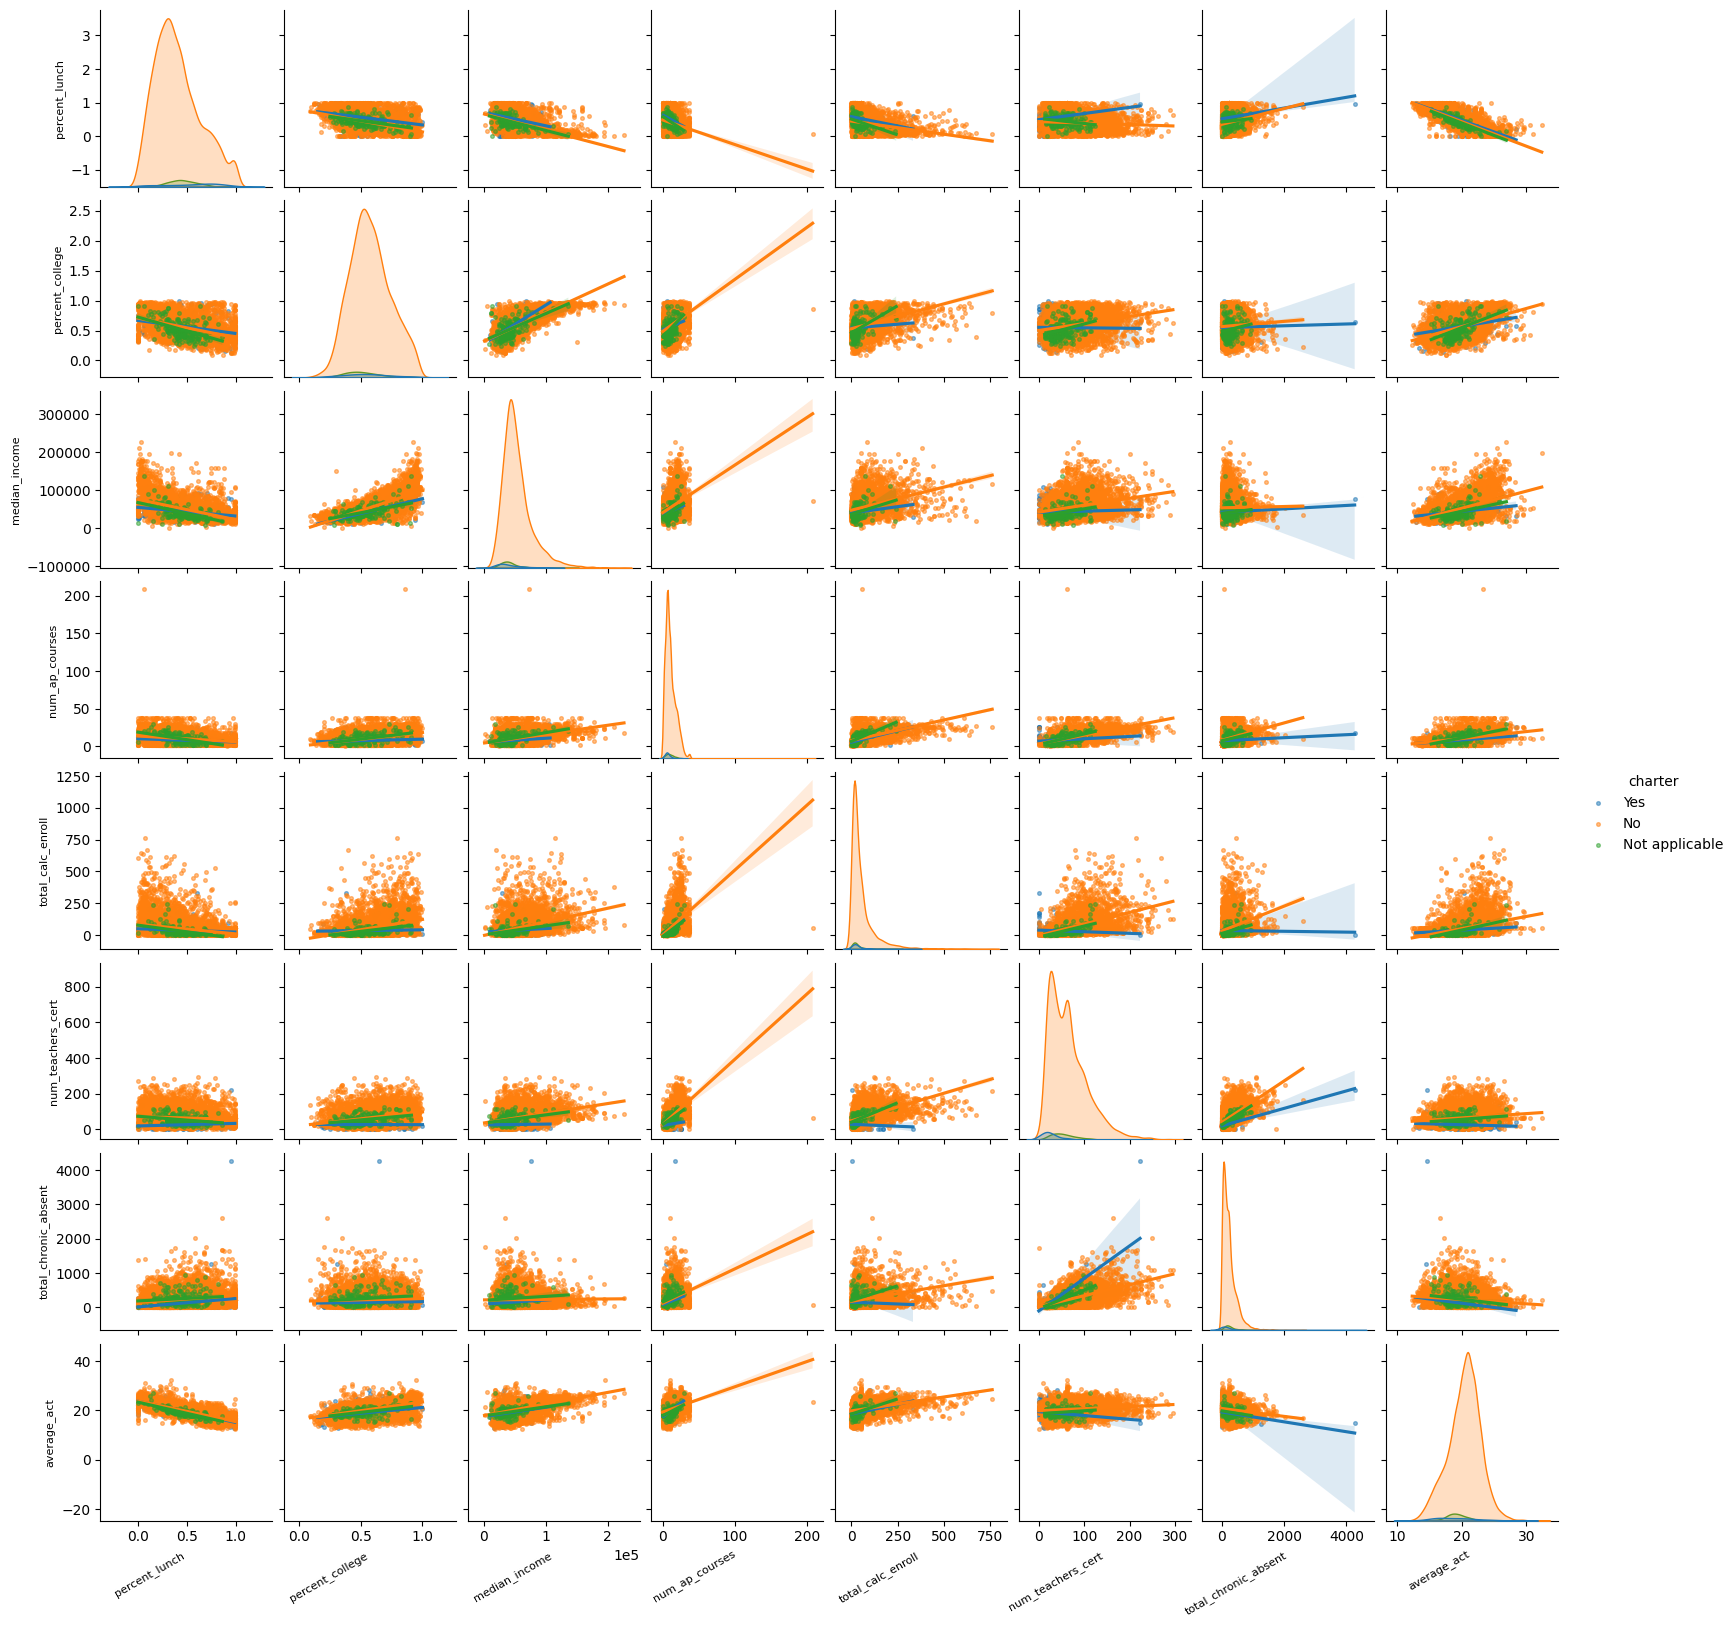

In [ ]:
# Create totals for key variables
df_final['total_ap_enroll'] = df_final['ap_enroll_male'] + df_final['ap_enroll_female']
df_final['total_calc_enroll'] = df_final['calc_enroll_male'] + df_final['calc_enroll_female']
df_final['total_chronic_absent'] = df_final['chronic_absent_male'] + df_final['chronic_absent_female']
df_final['total_suspensions'] = (df_final['oss_male'] + df_final['oss_female'] + 
                                   df_final['iss_male'] + df_final['iss_female'])


pairplot_vars = [
    'percent_lunch',
    'percent_college', 
    'median_income',
    'num_ap_courses',
    'total_calc_enroll',
    'num_teachers_cert',
    'total_chronic_absent',
    'average_act'
]

fig = sns.pairplot(
    data=df_final,
    vars=pairplot_vars,
    hue='charter',
    kind='reg',
    plot_kws={'scatter_kws': {'alpha': 0.5, 's': 7}},
    height=2
)

for ax in fig.axes.flat:
    if 'median_income' in ax.get_xlabel().lower():
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)

plt.show()

If you look at the bottom row, first four column, notice schools with higher percentages of students on free lunch (percent_lunch) have fewer AP courses, lower calculus enrollment, fewer certified teachers, and more chronic absenteeism. The downward slopes confirm your hypothesis that concentrated poverty correlates with fewer resources.

At the rightmost column, the upward slopes show that schools with more AP courses, higher calculus enrollment, and more certified teachers tend to have higher ACT scores. Interestingly, chronic absenteeism shows a negative relationship with ACT scores, as expected.

When we compare orange vs green charter schools, the overlapping colors suggest charter status doesn't dramatically change these fundamental patterns. Both charter and non-charter schools follow similar trends.

Surprisingly, from these visualization, the story emerges such that it supports our hypothesis that poverty leads to fewer opportunities then finally leads to lower test scores. High-poverty schools offer less advanced coursework, which correlates with lower ACT performance.

Lastly, the density plots (diagonal) show most variables are right-skewed, meaning most schools cluster at lower values with some outliers offering many more resources.


### Check for Outlier

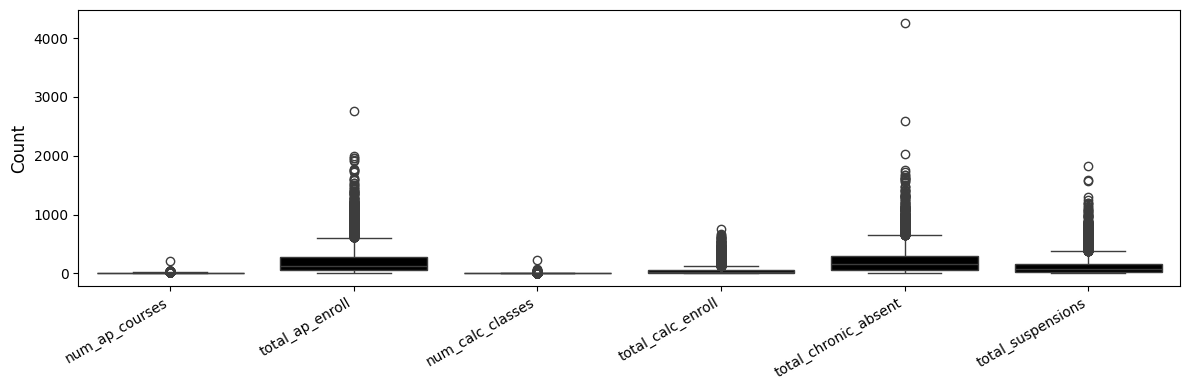

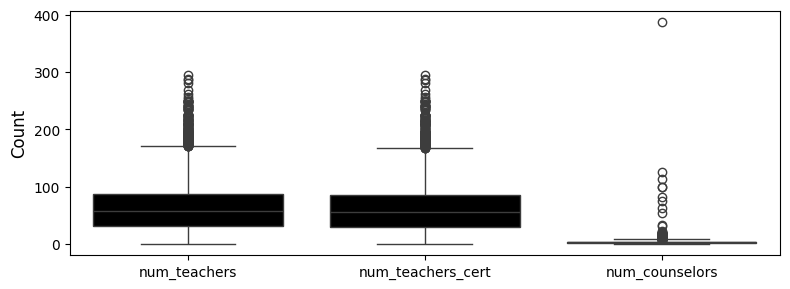

In [ ]:


# CRDC count variables (enrollment, classes)
crdc_counts = ['num_ap_courses', 'total_ap_enroll', 'num_calc_classes', 
               'total_calc_enroll', 'total_chronic_absent', 'total_suspensions']

plt.figure(figsize=(12, 4))
sns.boxplot(data=df_final[crdc_counts], color='k')
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Teacher/staff counts
staff_counts = ['num_teachers', 'num_teachers_cert', 'num_counselors']

plt.figure(figsize=(8, 3))
sns.boxplot(data=df_final[staff_counts], color='k')
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


Heavy right skewness with many outliers. This isn't an error in the data because counts naturally vary by school size:

- Large schools: 200+ teachers, 50+ AP courses, 2000+ AP students
- Small schools: 20 teachers, 5 AP courses, 100 AP students

This reflects real size differences between schools. Higher ouliers - Larger Schools.


Before modelling with ANOVA and regression fitting, notice that raw counts don't measure the level of access to resources from a school, but rahter it measure the school size. For instance:
- High-poverty school: 200 students, 5 AP courses
- Low-poverty school: 2000 students, 40 AP courses

Raw counts say the low-poverty school has "more" (40 > 5). In short, our research question asks whether poor schools offer less opportunity. Counts reflect school size, while rates show student access to opportunities—so we create rate-based columns to better measure educational equity.

### Creating Rates for CRDC predictors

Earlier, we face a negative prediction, but also note that our imputation method fills in missing data using regression predictions also. For example, sometimes it predicts impossible values like 150 AP students when the school only has 100 total students.

This is important because it creates impossible percentages (150%) that don't make sense.

After imputation, in this step, we capped the predicted counts at their logical maximum. For example, AP enrollment can't exceed total enrollment, so we set any predictions above that limit back down to 100%.

This ensures all our rates stay between 0-100%, reflecting real-world constraints.

In [ ]:
# Cap enrollments at total enrollment by gender
df_final['ap_enroll_male'] = df_final[['ap_enroll_male', 'total_enroll_male']].min(axis=1)
df_final['ap_enroll_female'] = df_final[['ap_enroll_female', 'total_enroll_female']].min(axis=1)
df_final['calc_enroll_male'] = df_final[['calc_enroll_male', 'total_enroll_male']].min(axis=1)
df_final['calc_enroll_female'] = df_final[['calc_enroll_female', 'total_enroll_female']].min(axis=1)
df_final['chronic_absent_male'] = df_final[['chronic_absent_male', 'total_enroll_male']].min(axis=1)
df_final['chronic_absent_female'] = df_final[['chronic_absent_female', 'total_enroll_female']].min(axis=1)

# Create totals
df_final['total_ap_enroll'] = df_final['ap_enroll_male'] + df_final['ap_enroll_female']
df_final['total_calc_enroll'] = df_final['calc_enroll_male'] + df_final['calc_enroll_female']
df_final['total_suspensions'] = (df_final['iss_male'] + df_final['iss_female'] + 
                                   df_final['oss_male'] + df_final['oss_female'])
df_final['total_chronic_absent'] = df_final['chronic_absent_male'] + df_final['chronic_absent_female']


df_final['total_enrollment'] = df_final['total_enroll_male'] + df_final['total_enroll_female']

# Cap totals at total_enrollment
df_final['total_ap_enroll'] = df_final[['total_ap_enroll', 'total_enrollment']].min(axis=1)
df_final['total_calc_enroll'] = df_final[['total_calc_enroll', 'total_enrollment']].min(axis=1)
df_final['total_suspensions'] = df_final[['total_suspensions', 'total_enrollment']].min(axis=1)
df_final['total_chronic_absent'] = df_final[['total_chronic_absent', 'total_enrollment']].min(axis=1)



# Create rate variables (per 100 students)
df_final['ap_courses_rate'] = (df_final['num_ap_courses'] / df_final['total_enrollment']) * 100
df_final['ap_enroll_rate'] = (df_final['total_ap_enroll'] / df_final['total_enrollment']) * 100
df_final['calc_classes_rate'] = (df_final['num_calc_classes'] / df_final['total_enrollment']) * 100
df_final['calc_enroll_rate'] = (df_final['total_calc_enroll'] / df_final['total_enrollment']) * 100
df_final['suspension_rate'] = (df_final['total_suspensions'] / df_final['total_enrollment']) * 100
df_final['chronic_absent_rate'] = (df_final['total_chronic_absent'] / df_final['total_enrollment']) * 100
df_final['counselor_rate'] = (df_final['num_counselors'] / df_final['total_enrollment']) * 100

# Check for any division by zero issues
rate_vars = ['ap_enroll_rate', 'calc_classes_rate', 'calc_enroll_rate', 
             'suspension_rate', 'chronic_absent_rate', 'counselor_rate']

df_final[rate_vars].describe()

ap_enroll_rate  calc_classes_rate  calc_enroll_rate  suspension_rate  \
count     7227.000000        7227.000000       7227.000000      7227.000000   
mean        20.260043           0.316427          5.063387        12.120540   
std         12.886855           0.482268          4.550131        10.871383   
min          0.000000           0.000000          0.000000         0.000000   
25%         10.824136           0.116891          2.222222         4.189885   
50%         19.230769           0.246305          3.975084         9.446254   
75%         26.917629           0.397022          6.308696        16.594415   
max        100.000000          17.713853         92.342342       100.000000   

       chronic_absent_rate  counselor_rate  
count          7227.000000     7227.000000  
mean             21.570051        0.367757  
std              15.358478        1.295344  
min               0.000000        0.000000  
25%              11.321955        0.248756  
50%              19.471154        0.314070  
75%              27.809774        0.387952  
max             100.000000       86.621924

#### Let's revisualize the Outliers again

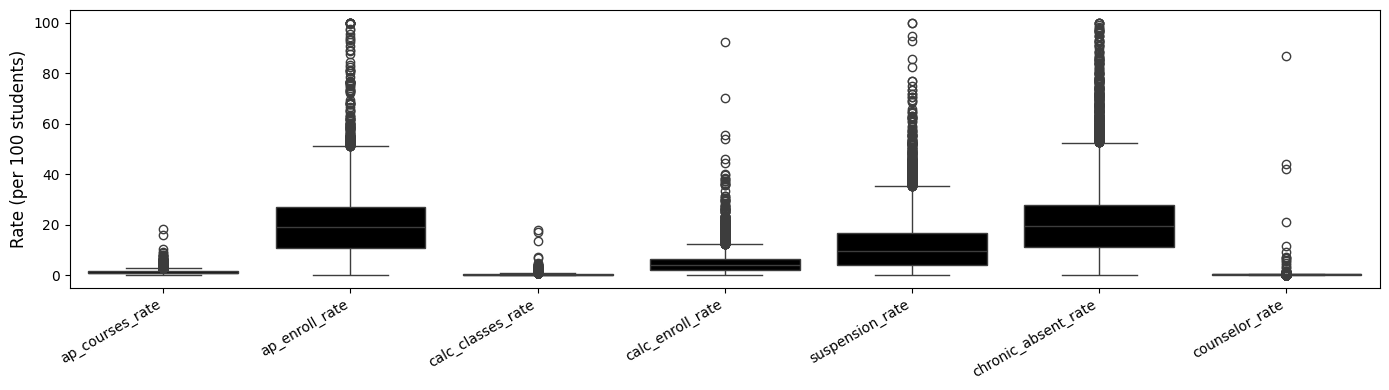

In [ ]:
rate_vars = ['ap_courses_rate', 'ap_enroll_rate', 'calc_classes_rate', 
             'calc_enroll_rate', 'suspension_rate', 'chronic_absent_rate', 
             'counselor_rate']

plt.figure(figsize=(14, 4))
sns.boxplot(data=df_final[rate_vars], color='k')
plt.ylabel('Rate (per 100 students)', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

92% of calculus enroll rate is pretty high, however, I suspected and assumed that some students were likely retake calculus. However, the counselor rate of 86 per 100 students is impossible because it suggests nearly one counselor for every student, which is unrealistic and likely a data entry error. Let's double check this:



In [ ]:
extreme = df_final[df_final['counselor_rate'] > 10]
print(f"Number of schools: {len(extreme)}")
print(extreme[['total_enrollment', 'num_counselors', 'counselor_rate']].head())

Number of schools: 5
      total_enrollment  num_counselors  counselor_rate
3129             447.0          387.20       86.621924
3489            1085.0          125.00       11.520737
5771             158.0           33.33       21.094937
6077             238.0          100.00       42.016807
7202             170.0           75.00       44.117647


These are clearly bad data; even 11.5 counselors per 100 students is impossible. That's more than 1 counselor per 10 students! To my understanding, typical high schools: ~1-2 counselors per 500 students (0.2-0.4 per 100). I think it would be best to drop this data because, dropping these 5 schools, it's only 0.07% of your data (5/7,227).




In [ ]:
df_final = df_final[df_final['counselor_rate'] <= 10]

#### Before Scaling
Let's double check the correlation between rates and total enrollment, if correlations are near zero, then we know that rates are independent of school size, approximately of course.

In [ ]:
# Check if rates still correlate with enrollment (they shouldn't!)
rate_vars = ['ap_courses_rate', 'ap_enroll_rate', 'calc_enroll_rate', 
             'suspension_rate', 'chronic_absent_rate', 'counselor_rate']

correlations = df_final[rate_vars + ['total_enrollment']].corr()['total_enrollment'][:-1]
print("Correlation between rates and total enrollment:")
print(correlations)

Correlation between rates and total enrollment:
ap_courses_rate       -0.355142
ap_enroll_rate         0.140937
calc_enroll_rate       0.050533
suspension_rate        0.050830
chronic_absent_rate    0.002551
counselor_rate        -0.124782
Name: total_enrollment, dtype: float64


In [ ]:
print(df_final[['total_enrollment', 'percent_lunch']].corr())

                  total_enrollment  percent_lunch
total_enrollment          1.000000      -0.074008
percent_lunch            -0.074008       1.000000


- Converting to rates successfully removed the school size effect - most correlations with enrollment are now near zero. This means we're measuring opportunity per student, not just counting resources.
- One exception: larger schools offer fewer AP courses per 100 students (correlation of -0.36). This isn't a data problem - it's a real pattern. Large schools serve more diverse student populations and must offer remedial, standard, and advanced courses. Smaller schools can concentrate resources on advanced offerings.
- This creates a confounding issue: school size is tangled with other factors like poverty level and location. Urban schools serving low-income students tend to be large and comprehensive. Affluent suburban schools can be smaller and AP-focused.

Later in regression section, we'll add total enrollment as a control variable in regression. This lets us separate poverty's effect from size-related differences.


# Scaling

 Note that we are creating rate predictors before scaling because raw counts (e.g., number of AP courses, number of suspensions) are confounded with school size, and rates (e.g., per 100 students) provide a standardized measure of access or occurrence.

In [ ]:
from sklearn.preprocessing import StandardScaler

# list of predictors to standardize
predictor_variables = [
    'rate_unemployment', 'percent_college', 'percent_married', 
    'median_income', 'percent_lunch', 'ap_courses_rate', 
    'ap_enroll_rate', 'calc_classes_rate', 'calc_enroll_rate', 
    'suspension_rate', 'chronic_absent_rate', 'counselor_rate',
    'total_enrollment'
]

# new column names for the standardized variables
scaled_columns = [var + '_normalized' for var in predictor_variables]

# Standardize the predictors
scaler = StandardScaler().fit(df_final[predictor_variables])
df_final.loc[:, scaled_columns] = scaler.transform(df_final[predictor_variables])

# double check the scaling
print(df_final[scaled_columns].agg(['mean', 'std']).round(3))

      rate_unemployment_normalized  percent_college_normalized  \
mean                          -0.0                         0.0   
std                            1.0                         1.0   

      percent_married_normalized  median_income_normalized  \
mean                         0.0                      -0.0   
std                          1.0                       1.0   

      percent_lunch_normalized  ap_courses_rate_normalized  \
mean                       0.0                        -0.0   
std                        1.0                         1.0   

      ap_enroll_rate_normalized  calc_classes_rate_normalized  \
mean                       -0.0                           0.0   
std                         1.0                           1.0   

      calc_enroll_rate_normalized  suspension_rate_normalized  \
mean                          0.0                        -0.0   
std                           1.0                         1.0   

      chronic_absent_rate_normalize

In [ ]:
# Select the normalized columns for the study    formula='average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized',

columns_for_study = [
    'average_act',
    'rate_unemployment_normalized', 
    'percent_college_normalized', 
    'percent_lunch_normalized', 
    'ap_courses_rate_normalized', 
    'ap_enroll_rate_normalized', 
    'calc_classes_rate_normalized', 
    'calc_enroll_rate_normalized', 
    'suspension_rate_normalized', 
    'chronic_absent_rate_normalized', 
    'counselor_rate_normalized',
    'total_enrollment_normalized'
]

# Create a new DataFrame with the selected columns
df_final_normalized = df_final[columns_for_study].copy()

# Display the first few rows of the new DataFrame
df_final_normalized

average_act  rate_unemployment_normalized  percent_college_normalized  \
0       20.433455                      0.380015                   -0.774266   
1       19.498168                     -0.573890                    0.544303   
2       19.554335                     -0.706864                    0.781361   
3       17.737485                     -0.914008                    0.721930   
4       18.245421                     -0.343640                    0.406649   
...           ...                           ...                         ...   
7222    18.500000                     -1.094079                    0.107866   
7223    22.300000                     -0.475750                    0.369056   
7224    21.500000                     -1.083307                    1.161514   
7225    19.700000                     -0.575796                    0.591398   
7226    21.800000                     -1.111679                    0.991417   

      percent_lunch_normalized  ap_courses_rate_normalized  \
0                    -1.467416                    0.200780   
1                    -1.273131                   -0.223180   
2                    -1.339710                   -0.049659   
3                    -0.485296                   -0.347513   
4                    -0.631804                   -0.552231   
...                        ...                         ...   
7222                 -0.761946                   -0.747650   
7223                 -1.394973                    2.794755   
7224                 -0.963983                   -0.018204   
7225                 -1.272402                   -0.521472   
7226                 -1.054179                    0.715850   

      ap_enroll_rate_normalized  calc_classes_rate_normalized  \
0                     -0.583142                      0.444596   
1                     -0.363712                     -0.369258   
2                      0.352188                     -0.395916   
3                     -0.149523                     -0.212585   
4                      0.393066                      0.064364   
...                         ...                           ...   
7222                  -0.758398                     -0.212585   
7223                   1.308627                      0.716758   
7224                   0.741040                     -0.656201   
7225                  -0.932869                     -0.389384   
7226                   0.513528                      0.315597   

      calc_enroll_rate_normalized  suspension_rate_normalized  \
0                        1.026377                   -0.838371   
1                       -0.534923                   -0.376733   
2                        0.225291                   -0.249015   
3                       -0.313432                   -0.039171   
4                       -0.327207                   -0.197143   
...                           ...                         ...   
7222                    -0.297758                   -0.459057   
7223                    -0.530693                   -0.566896   
7224                    -0.080688                    0.054521   
7225                    -0.773435                   -0.049709   
7226                     0.535334                   -0.511502   

      chronic_absent_rate_normalized  counselor_rate_normalized  \
0                          -0.552049                  -0.633017   
1                          -0.156466                  -0.244347   
2                           0.062852                   0.144346   
3                          -1.265895                   0.205275   
4                           0.425535                  -0.355523   
...                              ...                        ...   
7222                        0.444085                  -0.211290   
7223                       -0.283568                   1.256344   
7224                       -0.444335                   0.658285   
7225                        0.690796                   0.181150   
7226         

Save the normalized dataset, ready for analysis

In [ ]:
df_final.to_csv(
    '../data/education_crdc_final.csv',
    encoding='utf-8-sig',
    index=False
)

## MODELLING
### Are these pattern real or due to chance? and Does adding CRDC variables reduce poverty's effect on ACT?

Next:
- ANOVA to test resource differences by poverty level
- Sequential regression models for mediation
- Model comparisons to quantify variance explained

### ANOVA

Note on poverty categorization, we created tertiles (low, medium, high poverty) from the continuous percent_lunch variable to conduct ANOVA testing, which requires categorical groups. This categorization is appropriate for demonstrating that resource levels differ significantly across poverty concentrations. Later in the analysis, you will see the linear gradient observed in the results—where medium-poverty schools consistently fall between low and high-poverty extremes—indicates that poverty concentration relates continuously to school resources rather than forming distinct clusters. Therefore, the subsequent regression analysis will use the continuous normalized poverty measure rather than categories, as this approach preserves the full variation in the data and provides more precise estimates of how poverty predicts both resources and student outcomes. Machine learning clustering algorithms would not improve precision in this case, as they would impose artificial boundaries on what appears to be a smooth, continuous relationship.Retry

However, but first we need to confirm whether there is a statistically difference and to what extend (direction).

In [ ]:
df_final = df_final.copy()  # Ensure df_final is a copy
df_final['poverty_group'] = pd.qcut(
    df_final['percent_lunch_normalized'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

We created poverty tertiles (low/medium/high) for Analysis of Variance (ANOVA) testing. This approach divides schools into three equal groups based on poverty concentration, enabling clearer comparisons of how resource availability differs between low, medium, and high-poverty schools.



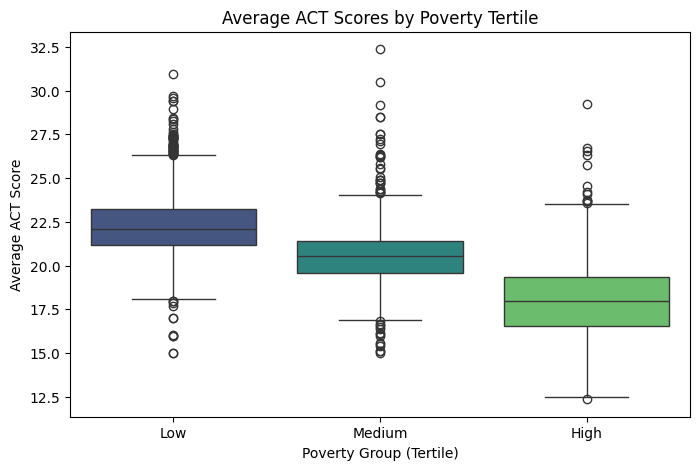

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_final,
    x='poverty_group',
    y='average_act',
    hue='poverty_group',      
    palette='viridis',
    legend=False            
)
plt.title('Average ACT Scores by Poverty Tertile')
plt.xlabel('Poverty Group (Tertile)')
plt.ylabel('Average ACT Score')
plt.show()

We chose tertile because it divides data into three equal-sized groups, making it easy to compare outcomes or resources across low, medium, and high categories. We use tertiles here so differences between poverty levels are clear and statistically testable, rather than relying on arbitrary cutoffs. 

Note that the thresholds for categorizing schools as low, medium, or high poverty can vary depending on specific federal guidelines. For the purposes of this statistical analysis, we use tertiles (three equal-sized groups) based on the distribution of our data. This approach is reasonable given the patterns observed in the visualization above.




In [ ]:
# we need a list of resource variables to test
resource_vars = [
    'ap_courses_rate_normalized',
    'ap_enroll_rate_normalized', 
    'calc_enroll_rate_normalized',
    'counselor_rate_normalized',
    'chronic_absent_rate_normalized',
    'suspension_rate_normalized'
]
anova_results = {}

for resource in resource_vars:
    # Fit model: resource ~ poverty_group
    formula = f'{resource} ~ C(poverty_group)'
    model = smf.ols(formula, data=df_final).fit()
    
    # Get ANOVA table
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # look at F-statistic and p-value only
    anova_results[resource] = {
        'F_statistic': anova_table.loc['C(poverty_group)', 'F'],
        'p_value': anova_table.loc['C(poverty_group)', 'PR(>F)'],
        'significant': anova_table.loc['C(poverty_group)', 'PR(>F)'] < 0.05
    }

# Display results
results_df = pd.DataFrame(anova_results).T
print("\nANOVA Results: Do resources differ by poverty level?")
results_df.round(4)


ANOVA Results: Do resources differ by poverty level?


F_statistic   p_value significant
ap_courses_rate_normalized       67.717673       0.0        True
ap_enroll_rate_normalized       157.582161       0.0        True
calc_enroll_rate_normalized     282.735904       0.0        True
counselor_rate_normalized         12.70237  0.000003        True
chronic_absent_rate_normalized  469.666266       0.0        True
suspension_rate_normalized      928.639675       0.0        True

All p value is essentially 0, this provides strong statistical evidence that high-poverty schools do not have the same resource levels as low-poverty schools. However, we don't know the dirrection of the value, meaning we don't know if high poverty school have fewer resource, not more.

In [ ]:
# Calculate mean resource levels by poverty group
resource_vars = [
    'ap_courses_rate_normalized',
    'ap_enroll_rate_normalized', 
    'calc_enroll_rate_normalized',
    'counselor_rate_normalized',
    'chronic_absent_rate_normalized',
    'suspension_rate_normalized'
]

# Group means
means_by_poverty = df_final.groupby('poverty_group', observed=True)[resource_vars].mean()

print("\nMean Resource Levels by Poverty Group:")
means_by_poverty.round(3)


Mean Resource Levels by Poverty Group:


ap_courses_rate_normalized  ap_enroll_rate_normalized  \
poverty_group                                                          
Low                                 0.172                      0.289   
Medium                             -0.013                     -0.129   
High                               -0.159                     -0.160   

               calc_enroll_rate_normalized  counselor_rate_normalized  \
poverty_group                                                           
Low                                  0.376                      0.082   
Medium                              -0.133                     -0.055   
High                                -0.243                     -0.027   

               chronic_absent_rate_normalized  suspension_rate_normalized  
poverty_group                                                              
Low                                    -0.383                      -0.552  
Medium                                 -0.059                      -0.004  
High                                    0.442                       0.556

- For advanced coursework access, low poverty group show substantially higher rates than high ones. The difference is particularly pronounced for calculus with low poverty school average 0.376 standard deviations above the mean while high-poverty schools fall 0.243 standard deviations below **(note that we are working with StandardScaler, hence the values are now expressed in units of standard deviations from the mean)**.

- We see the same pattern with advanced Placement course, offerings and enrollment follow the same pattern with low-poverty schools offering significantly more opportunities per student. This validates our hypothesis that schools serving concentrated poverty populations provide fewer college-preparatory pathways.

- The couseor availability gap is sustantially smaller, however, due to the nature of counselor as role, even modest differences in access could compound other resource disparities.

- To my surprise, high-poverty schools experience chronic absenteeism rates nearly a full standard deviation higher than low-poverty schools, and suspension rates more than a full standard deviation higher. This is simply a telling-sign such that high-poverty schools face additional climate and engagement challenges that may further impede academic achievement beyond the resource gaps in course offerings.

- Lastly, I noticed that medium poverty schools consistently hover between (closer to 0), indicating that this is a continuous linear gradient rather than a categorical difference. There exists a linear pattern such that institutional resource allocation tracks closely with student economic composition.

#### Visualized Mean Resource Levels by Poverty Group:


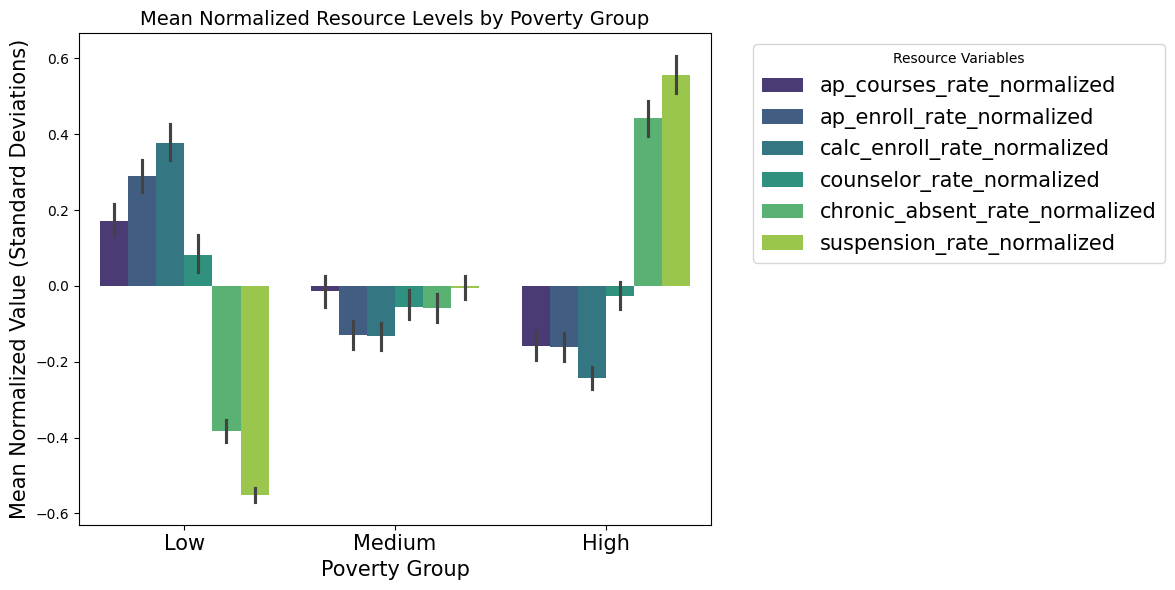

In [ ]:
# Instead of plotting means_by_poverty, we also use the original DataFrame (df_final)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_final.melt(
        id_vars='poverty_group',
        value_vars=resource_vars,
        var_name='Resource Variable',
        value_name='Mean Normalized Value'
    ),
    x='poverty_group',
    y='Mean Normalized Value',
    hue='Resource Variable',
    palette='viridis'
)
plt.title('Mean Normalized Resource Levels by Poverty Group', fontsize=14)
plt.ylabel('Mean Normalized Value (Standard Deviations)', fontsize=15)
plt.xlabel('Poverty Group', fontsize=15)
plt.xticks(rotation=0, fontsize=15)
plt.legend(title='Resource Variables', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)
plt.tight_layout()
plt.show()

### Regression

ANOVA confirmed that high-poverty schools systematically offer fewer advanced academic opportunities. Since poverty and resources demonstrate a continuous linear relationship rather than discrete categorical differences, next, it would make sense for us to use regression, allowing us to model this graduated effect and quantify whether resource differences statistically mediate the pathway from poverty concentration to ACT performance.


##### Single Input Model: Total effect of poverty on ACT (baseline)


In [ ]:
model1 = smf.ols('''average_act ~ rate_unemployment_normalized + 
                    percent_college_normalized + 
                    percent_lunch_normalized''', 
                 data=df_final).fit()

y_pred_m1 = model1.fittedvalues
y_true_m1 = df_final['average_act']
mae = mean_absolute_error(y_true_m1, y_pred_m1)
rmse = np.sqrt(mean_squared_error(y_true_m1, y_pred_m1))

print("="*70)
print("Baseline (Original Socioeconomic Model)")
print("="*70)
print(model1.summary().tables[1]) # no need for full summary, look complicated and messy and some of the metrics are  out of scope of this project
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"\nR-squared: {model1.rsquared:.4f}")
print(f"Poverty coefficient: {model1.params['percent_lunch_normalized']:.4f}")


Baseline (Original Socioeconomic Model)
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       20.2983      0.018   1127.335      0.000      20.263      20.334
rate_unemployment_normalized    -0.1222      0.021     -5.779      0.000      -0.164      -0.081
percent_college_normalized       0.2827      0.021     13.507      0.000       0.242       0.324
percent_lunch_normalized        -1.7780      0.022    -82.026      0.000      -1.821      -1.736
Mean Absolute Error (MAE): 1.1452
Root Mean Squared Error (RMSE): 1.5297

R-squared: 0.6282
Poverty coefficient: -1.7780


The baseline model shows that poverty (percent_lunch) has the strongest negative impact on ACT scores, with higher poverty linked to significantly lower scores. The model explains 62.8% of the variation in ACT scores, with unemployment and college education also contributing.



#### Full Model - Multiple Linear Regression

First let's include modell without total enrollment as control variable for the correlation between AP course rate and total enrollment (meaning larger schools systematically offer fewer AP courses per student). 

In [ ]:
model2 = smf.ols('''average_act ~ rate_unemployment_normalized + 
                    percent_college_normalized + 
                    percent_lunch_normalized +
                    ap_courses_rate_normalized + 
                    calc_enroll_rate_normalized +
                    counselor_rate_normalized +
                    chronic_absent_rate_normalized +
                    suspension_rate_normalized''', 
                 data=df_final).fit()
y_pred_m2 = model2.fittedvalues
y_true_m2 = df_final['average_act']
mae2 = mean_absolute_error(y_true_m2, y_pred_m2)
rmse2 = np.sqrt(mean_squared_error(y_true_m2, y_pred_m2))

print("\n" + "="*70)
print("Full Model (Socioeconomic + Resources + Climate)")
print("="*70)
print(model2.summary().tables[1])
print(f"Mean Absolute Error (MAE): {mae2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse2:.4f}")
print(f"\nR-squared: {model2.rsquared:.4f}")
print(f"Poverty coefficient: {model2.params['percent_lunch_normalized']:.4f}")
print(f"Change from baseline: {model1.params['percent_lunch_normalized'] - model2.params['percent_lunch_normalized']:.4f}")


Full Model (Socioeconomic + Resources + Climate)
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         20.2983      0.017   1165.067      0.000      20.264      20.332
rate_unemployment_normalized      -0.1266      0.021     -6.124      0.000      -0.167      -0.086
percent_college_normalized         0.2322      0.021     11.239      0.000       0.192       0.273
percent_lunch_normalized          -1.5713      0.024    -66.687      0.000      -1.618      -1.525
ap_courses_rate_normalized         0.0233      0.018      1.259      0.208      -0.013       0.060
calc_enroll_rate_normalized        0.2586      0.019     13.529      0.000       0.221       0.296
counselor_rate_normalized         -0.0246      0.018     -1.380      0.168      -0.059       0.010
chronic_absent_rate_normalized    -0.1362      0.019     -7

These two variables are insignificant:
- ap_courses_rate_normalized         0.0233      0.018      1.259      0.208      -0.013       0.060
- counselor_rate_normalized         -0.0246      0.018     -1.380      0.168      -0.059       0.010

Now what if we include the total enrollment normalized as controll variable, what do we expect to see?

In [ ]:
model2 = smf.ols('''average_act ~ rate_unemployment_normalized + 
                    percent_college_normalized + 
                    percent_lunch_normalized +
                    ap_courses_rate_normalized + 
                    calc_enroll_rate_normalized +
                    counselor_rate_normalized +
                    chronic_absent_rate_normalized +
                    suspension_rate_normalized + 
                    total_enrollment_normalized''', 
                 data=df_final).fit()
y_pred_m2 = model2.fittedvalues
y_true_m2 = df_final['average_act']
mae2 = mean_absolute_error(y_true_m2, y_pred_m2)
rmse2 = np.sqrt(mean_squared_error(y_true_m2, y_pred_m2))

print("\n" + "="*70)
print("Full Model (Socioeconomic + Resources + Climate)")
print("="*70)
print(model2.summary().tables[1])
print(f"Mean Absolute Error (MAE): {mae2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse2:.4f}")
print(f"\nR-squared: {model2.rsquared:.4f}")
print(f"Poverty coefficient: {model2.params['percent_lunch_normalized']:.4f}")
print(f"Change from baseline: {model1.params['percent_lunch_normalized'] - model2.params['percent_lunch_normalized']:.4f}")


Full Model (Socioeconomic + Resources + Climate)
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         20.2983      0.017   1173.544      0.000      20.264      20.332
rate_unemployment_normalized      -0.1286      0.021     -6.269      0.000      -0.169      -0.088
percent_college_normalized         0.1656      0.022      7.701      0.000       0.123       0.208
percent_lunch_normalized          -1.5706      0.023    -67.142      0.000      -1.616      -1.525
ap_courses_rate_normalized         0.0977      0.020      4.952      0.000       0.059       0.136
calc_enroll_rate_normalized        0.2402      0.019     12.603      0.000       0.203       0.278
counselor_rate_normalized         -0.0107      0.018     -0.605      0.545      -0.045       0.024
chronic_absent_rate_normalized    -0.1346      0.019     -7

- The inclusion of total enrollment normalized as a control variable likely explains why the significance of ap_courses_rate_normalized changed from insignificant to significant. Basically, without controlling for total enrollment, ap course rate has been confounded by school size. Hence, total enrollment is the confounding factor. This further tells us that, by including the total enrollment as a control variable reveals a suppression effect that was masking the true relationship between Advanced Placement course access and ACT scores.

- So previously we observed that AP courses rates offer fewer in larger school. Though, larger schools may independently achieve higher test scores for reasons unrelated to AP course density, for instance, it could be due to economies of scale in hiring specialized teachers, greater course variety allowing better student-course matching, or selective enrollment patterns where larger schools serve different populations; We don't know, however, as we controlled, the enrollment control captures the independent association between school size and achievement, meaning that AP courses helping achievement but being less common in larger schools that independently perform better.

- Hence as we include the total enrollment, the AP course rate can finally show its genuine contribution to achievement because you have removed the confounding influence of school size that was previously suppressing this relationship. We additional see that the improved model fit from R-squared of 0.652 to 0.657 indicates that school size explains additional variance in ACT scores beyond what the other variables capture. Though we see a subtle unchanged of percent_lunch (poverty indicator) at negative 1.5713 versus negative 1.5706, confirming that controlling for school size does not meaningfully alter your central finding about poverty concentration effects.

In the next model, we removed counselor_rate_normalized as it is statistically insignificant in explaining average ACT score when account for school size and academic resources and school climite


#### Reduced Model

In [ ]:
model3 = smf.ols('''average_act ~ rate_unemployment_normalized + 
                    percent_college_normalized + 
                    percent_lunch_normalized +
                  ap_courses_rate_normalized +
                 total_enrollment_normalized +
                    calc_enroll_rate_normalized +
                    chronic_absent_rate_normalized +
                    suspension_rate_normalized''', 
                 data=df_final).fit()
y_pred_m3 = model3.fittedvalues
y_true_m3 = df_final['average_act']
mae3 = mean_absolute_error(y_true_m3, y_pred_m3)
rmse3 = np.sqrt(mean_squared_error(y_true_m3, y_pred_m3))

print("\n" + "="*70)
print("Full Model (Socioeconomic + Resources + Climate EXCEPT AP Courses & Counselor Rate)")
print("="*70)
print(model3.summary().tables[1])
print(f"Mean Absolute Error (MAE): {mae3:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse3:.4f}")
print(f"\nR-squared: {model3.rsquared:.4f}")
print(f"Poverty coefficient: {model3.params['percent_lunch_normalized']:.4f}")
print(f"Change from baseline: {model1.params['percent_lunch_normalized'] - model3.params['percent_lunch_normalized']:.4f}")


Full Model (Socioeconomic + Resources + Climate EXCEPT AP Courses & Counselor Rate)
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         20.2983      0.017   1173.596      0.000      20.264      20.332
rate_unemployment_normalized      -0.1289      0.021     -6.285      0.000      -0.169      -0.089
percent_college_normalized         0.1649      0.021      7.679      0.000       0.123       0.207
percent_lunch_normalized          -1.5704      0.023    -67.143      0.000      -1.616      -1.525
ap_courses_rate_normalized         0.0960      0.020      4.917      0.000       0.058       0.134
total_enrollment_normalized        0.2061      0.020     10.389      0.000       0.167       0.245
calc_enroll_rate_normalized        0.2402      0.019     12.603      0.000       0.203       0.278
chronic_absent_rate_norm

The reduced model shows that poverty (percent_lunch) remains the strongest predictor of lower ACT scores, though its impact slightly decreases when adding institutional factors like calculus enrollment and suspension rates. The model explains 65.2% of score variation, improving slightly over the baseline.



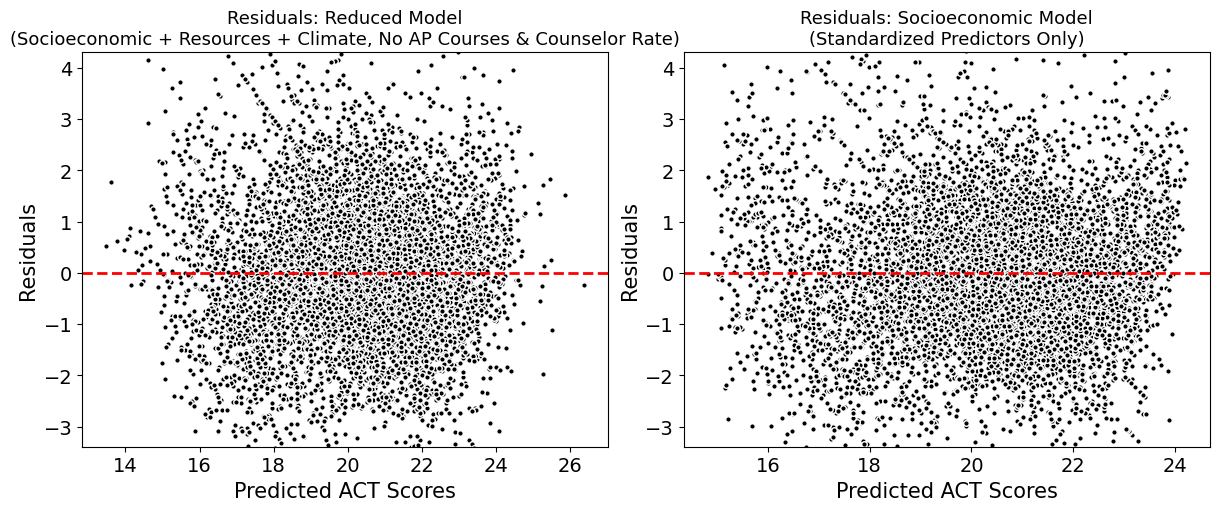

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def resid_plot(ax, model, title):
    fitted = model.fittedvalues
    resid  = model.resid
    ax.plot(fitted, resid, 'ko', mec='w', ms=4)  # black dots w/ white edge
    ax.axhline(0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Predicted ACT Scores', fontsize=15)
    ax.set_ylabel('Residuals', fontsize=15)
    ax.set_title(title, fontsize=13)
    ax.tick_params(labelsize=14)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# Plot for the reduced model
resid_plot(axes[0], model3, 'Residuals: Reduced Model\n(Socioeconomic + Resources + Climate, No AP Courses & Counselor Rate)')

# Plot for the socioeconomic model
resid_plot(axes[1], model_normalized, 'Residuals: Socioeconomic Model\n(Standardized Predictors Only)')

# Keep a shared y-scale so the two panels are comparable
all_resid = np.concatenate([model3.resid.values, model_normalized.resid.values])
low, high = np.nanpercentile(all_resid, [1, 99])
for ax in axes:
    ax.set_ylim(low, high)

plt.show()

Both models show approximately random scatter of residuals around zero across the range of predicted values, indicating that the linear model assumptions hold reasonably well. The reduced model incorporating institutional factors shows marginally tighter residual patterns, consistent with the modest improvement in R-squared from 0.628 to 0.652 and the small reductions in prediction errors. The similarity of the residual patterns reinforces that while institutional resources matter, they explain only an incremental portion of the variance beyond what socioeconomic factors already capture.


# Conclusion




Recap: our original analysis identified that school poverty concentration (implying through percent_lunch - poor student in a particular school offer high percentage of free lunch and reduced price indicates poverty) as the dominant predictor of ACT performance, with schools experiencing one standard deviation higher in free lunch eligibility showing average test sore of 1.78 lower when controlling for community education levels and unemployment rates. After we incorporate measurement from institutional resources and school climate data, this poverty effect (percent_lunch) decreases to 1.57 points, representing a reduction of approximately 0.21 points or around 12 percent of the original relationship. This hints us of the measurable differences in how school allocate resources and manage their learning environments contribute meaningfully to achievement gaps. However, they only explain a modest picture of the total poverty effect.

Our ANOVA analysis showed that high-poverty schools have significantly fewer AP courses, lower calculus enrollment, and fewer counselors per student compared to low poverty schools. The pattern is for sure consistent and statistically significant across all resource measures.

However, further attempt to explain the percent_lunch (poverty effect) and ACT score relationship but after including additonal data on institutional resrouces and school climate, we were only able to partially explained. By adding institutional resource variables reduced the poverty coefficient from -1.78 to -1.57, explaining approximately 12% of the original poverty effect.

Four institutional factors emerged as significant mediators:

- Calculus enrollment access (+0.24)
- AP course availability (+0.10)
- Suspension rates (-0.254)
- Chronic absenteeism (-0.14)

In short, while unequal resource distribution contributes meaningfully to achievement gaps, 88% (-1.573/-1.778) of the poverty effect operates through other pathways not captured by these institutional measures. Resource equity matters, but it's insufficient alone to eliminate achievement disparities. We can conclude that our analysis confirms that achievement gaps reflect both institutional inequalities (which schools can address) and broader socioeconomic factors (which require comprehensive interventions beyond schooling)

By controlling for school size, we uncovered the true impact of AP course availability on ACT scores, raising the question: could school size itself be a hidden factor shaping the broader relationship between poverty and academic achievement?



